/notebooks/benchmark/utils.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1)


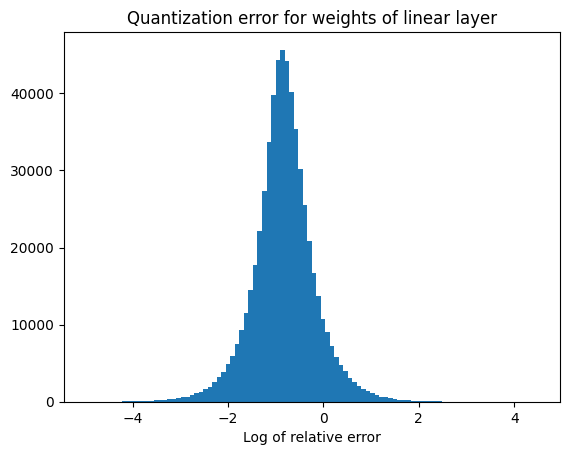

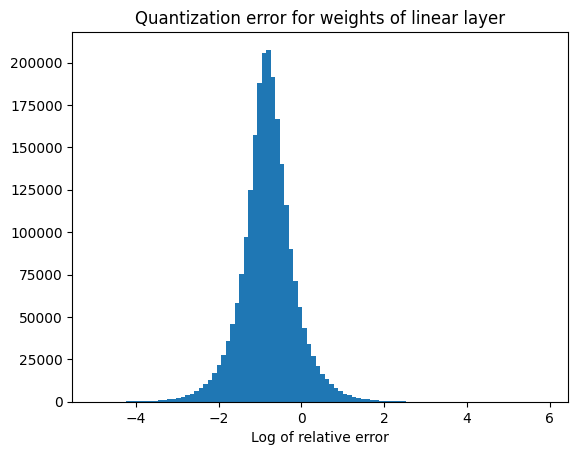

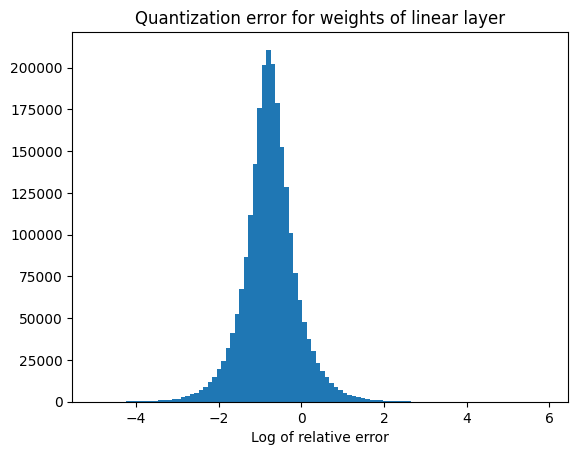

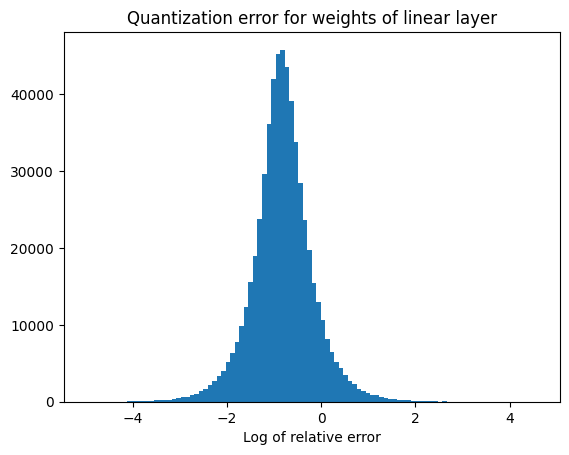

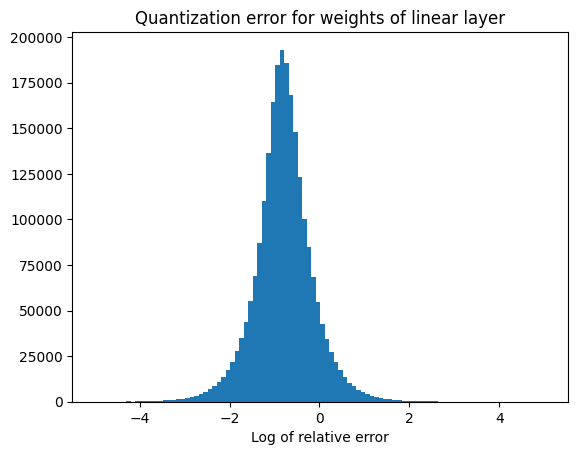

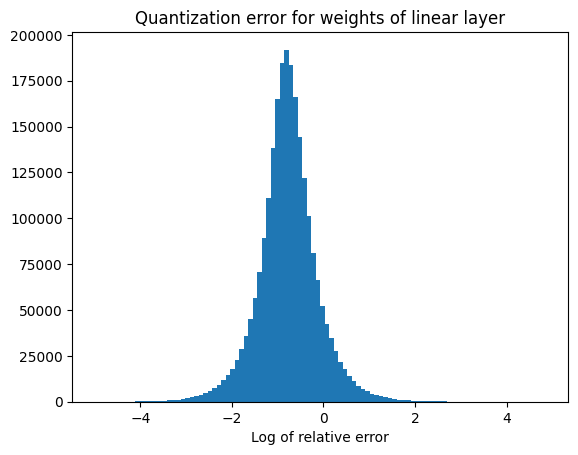

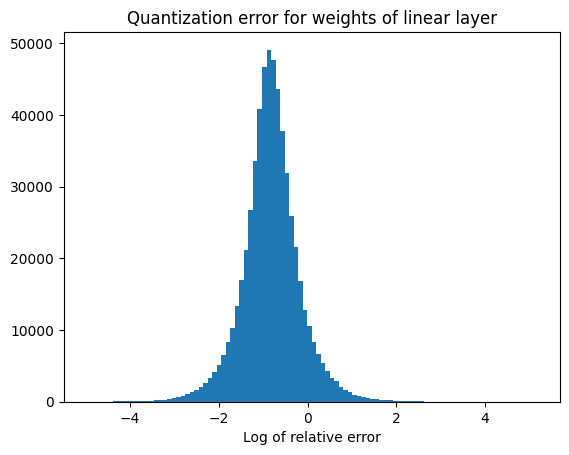

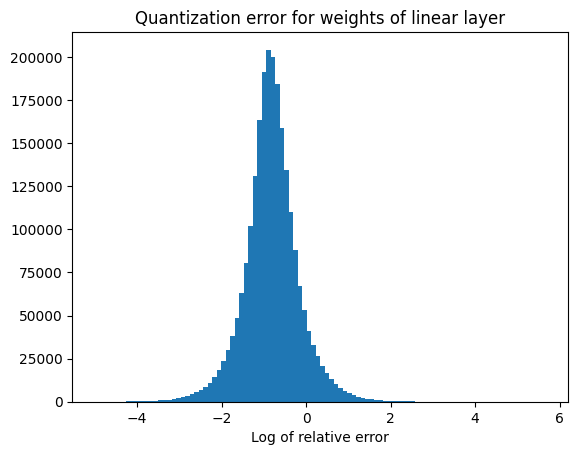

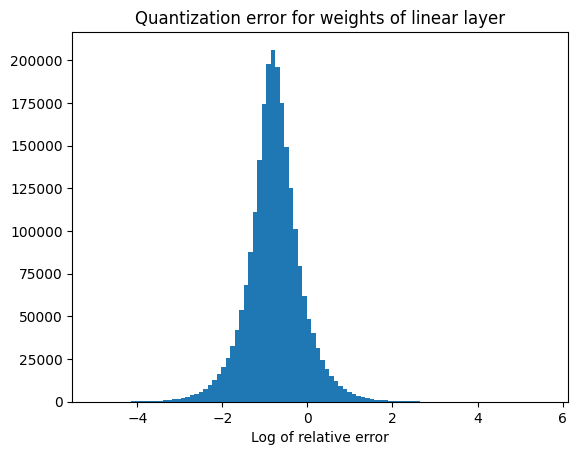

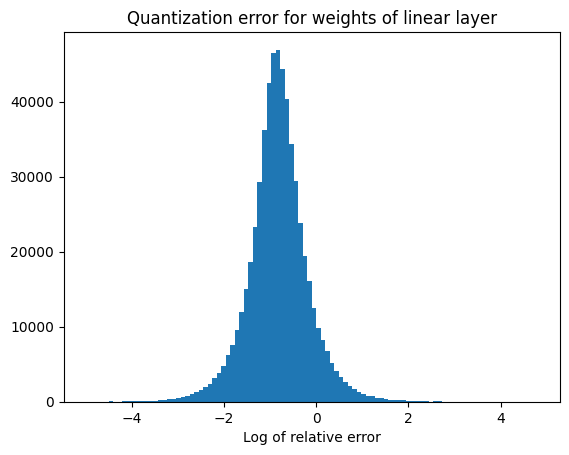

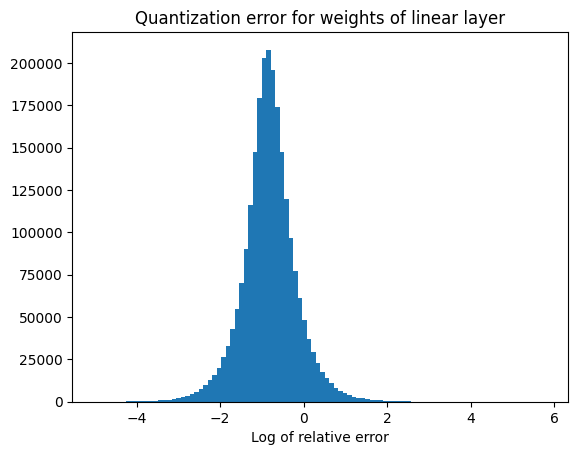

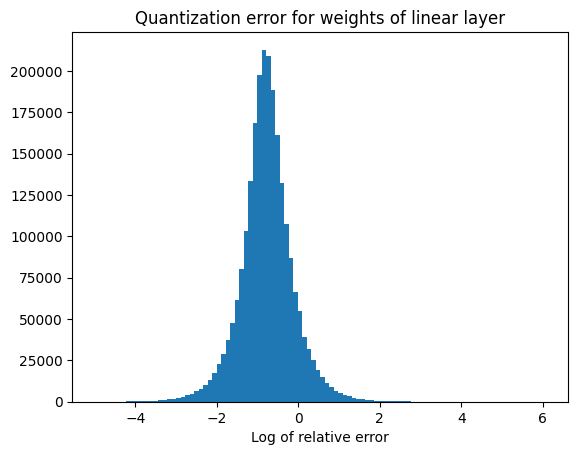

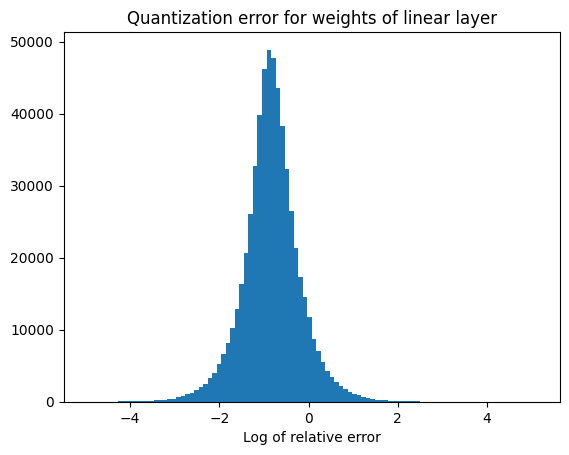

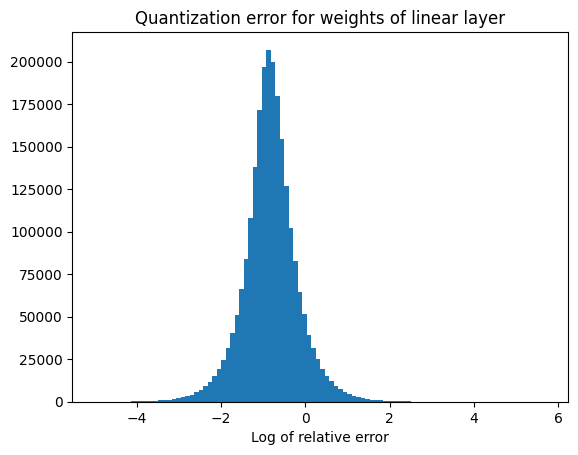

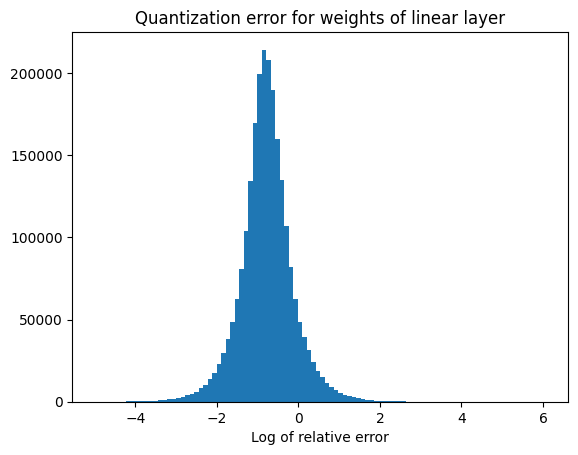

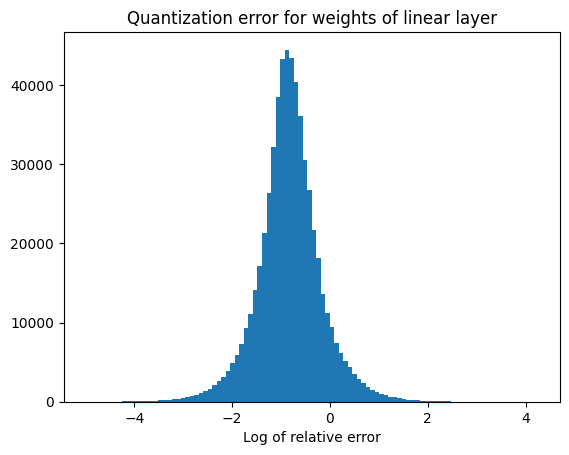

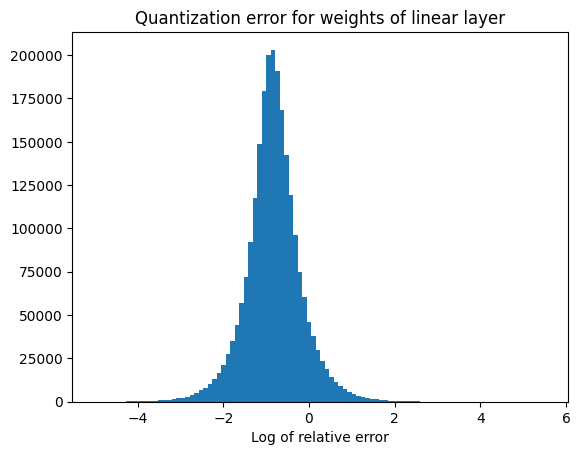

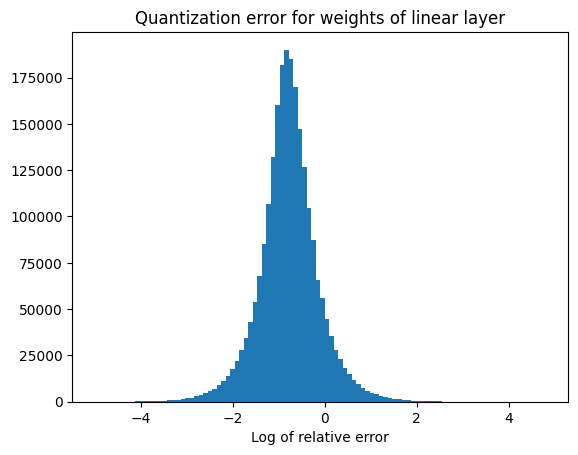

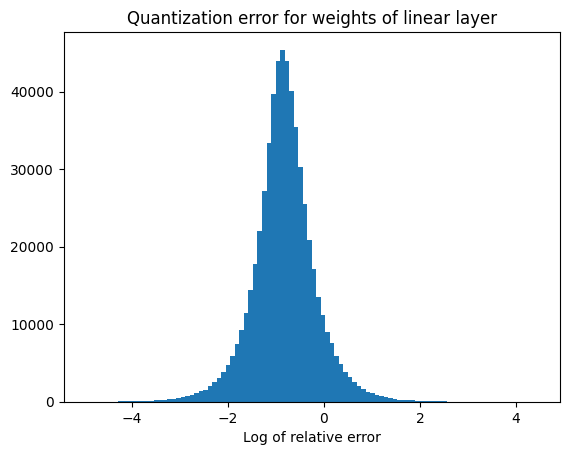

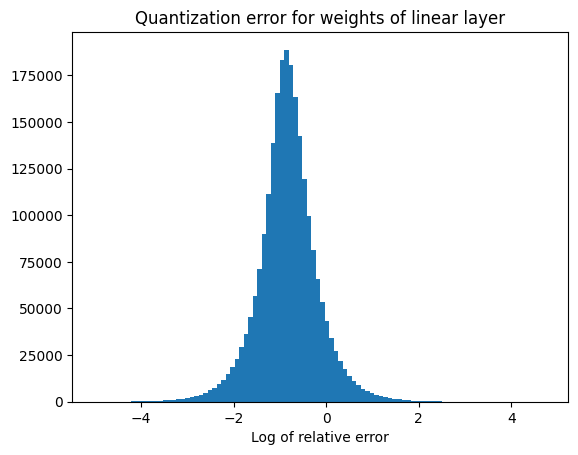

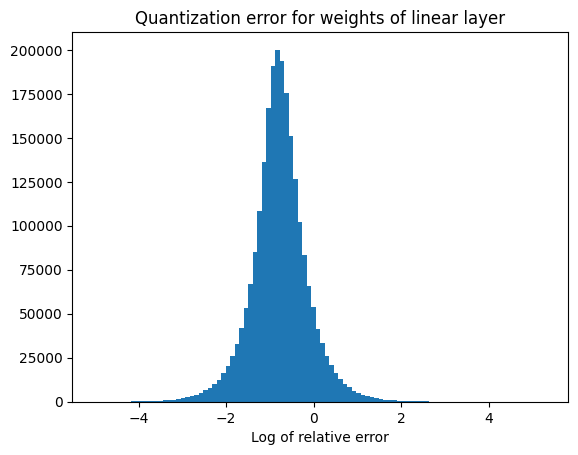

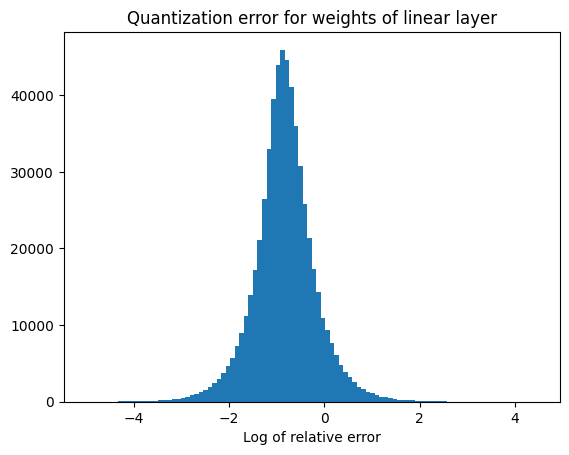

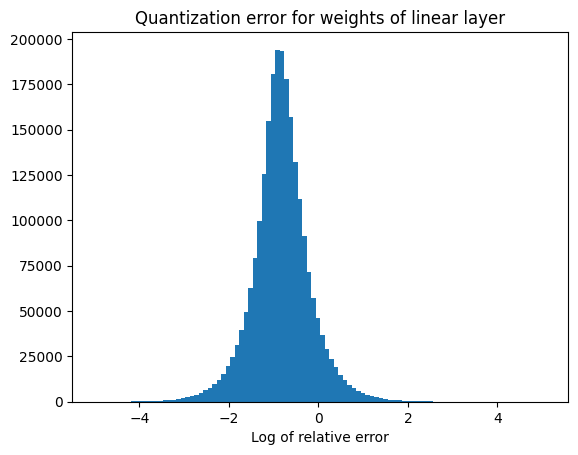

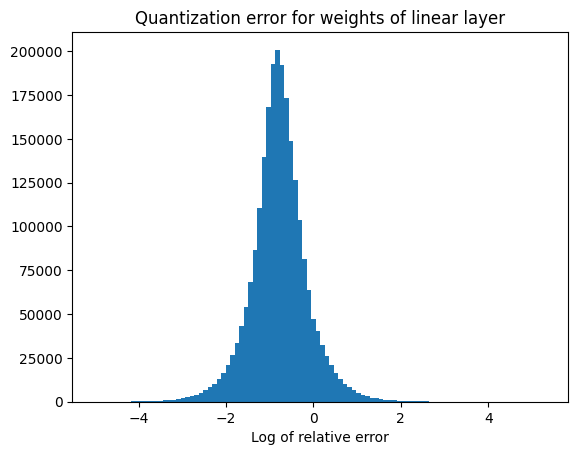

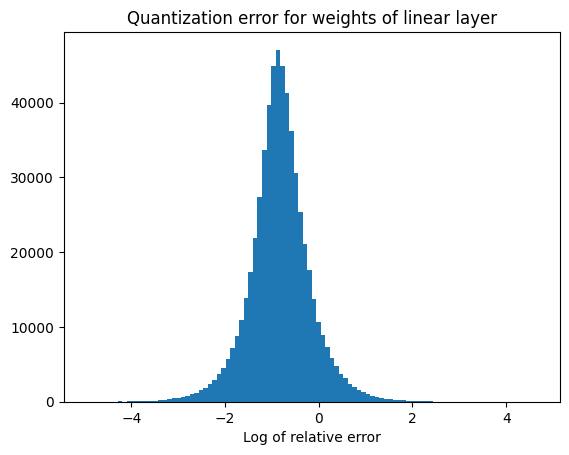

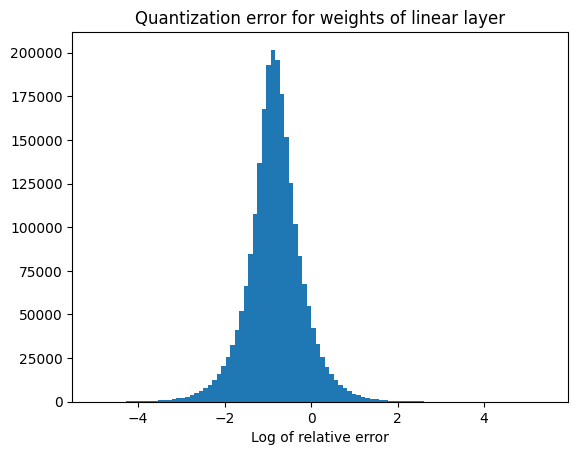

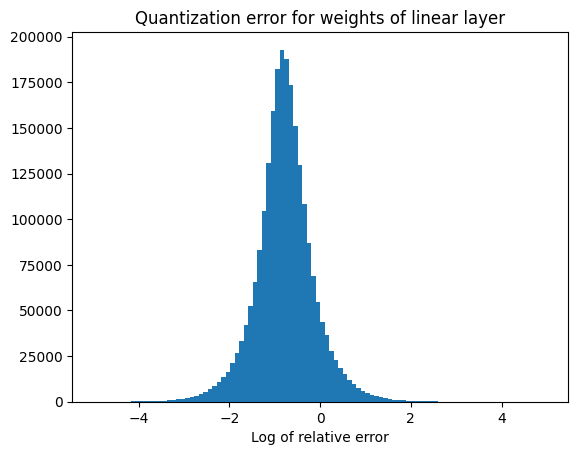

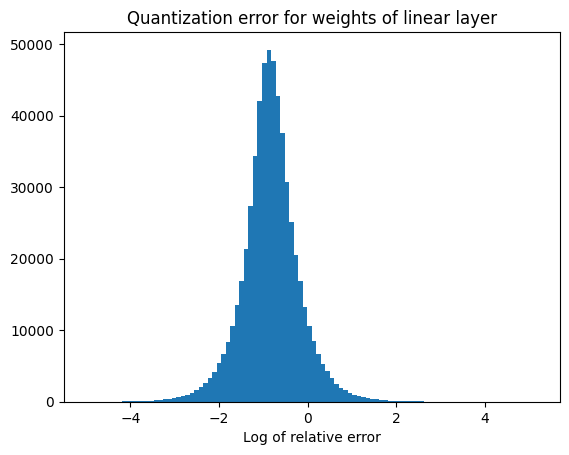

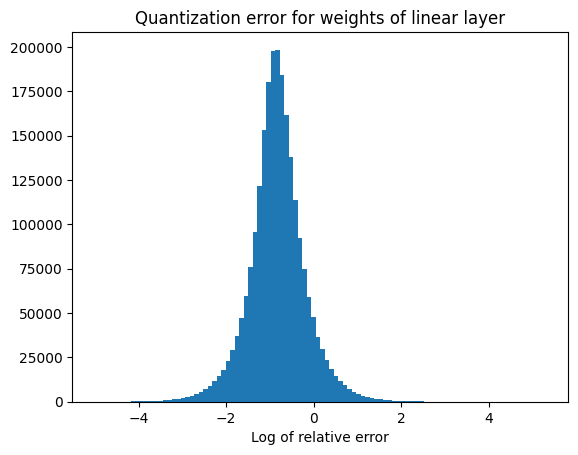

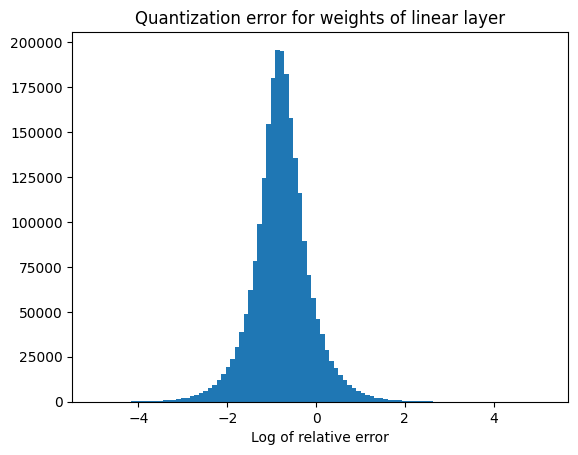

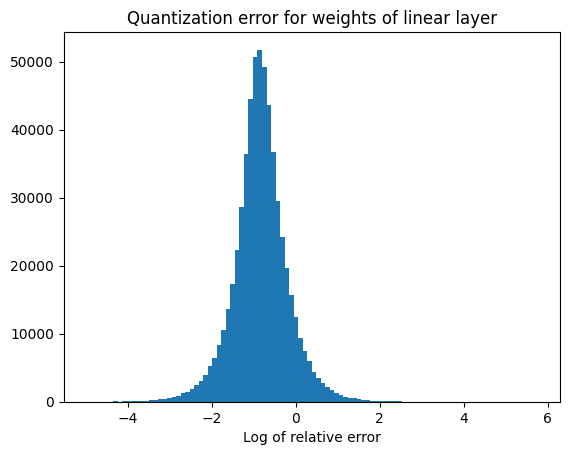

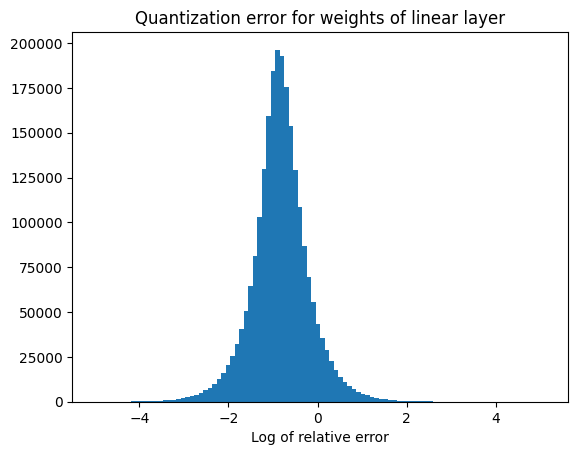

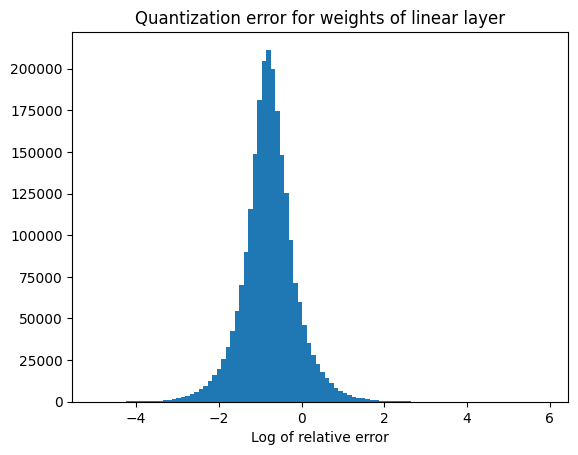

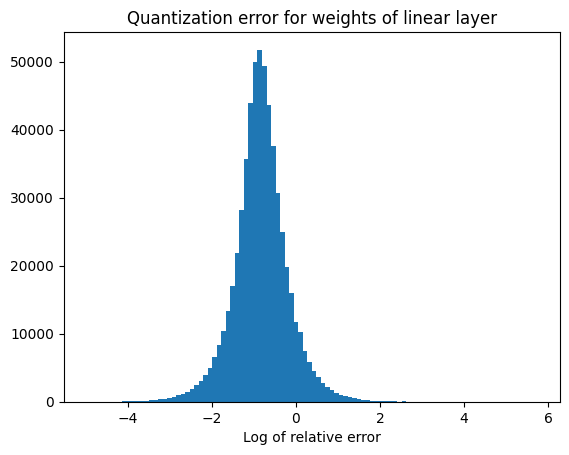

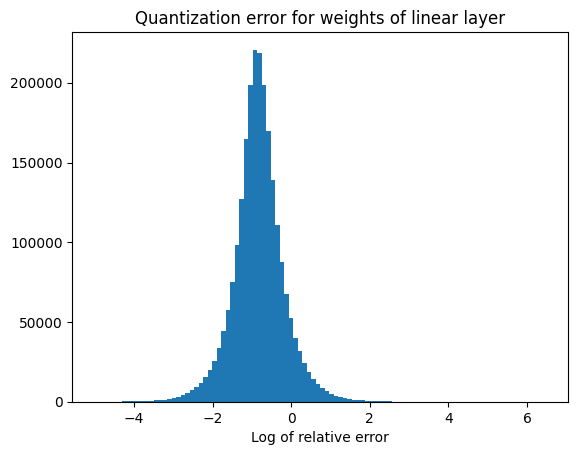

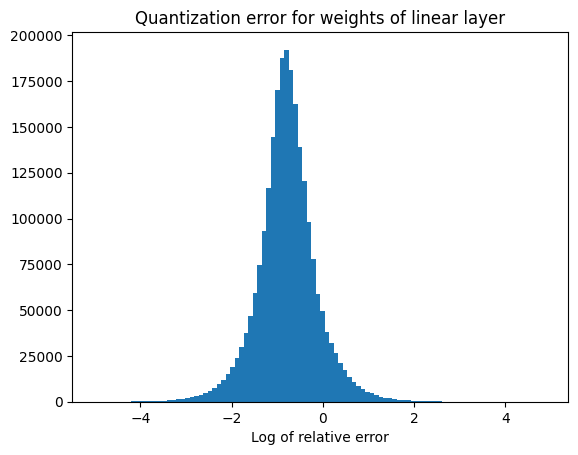

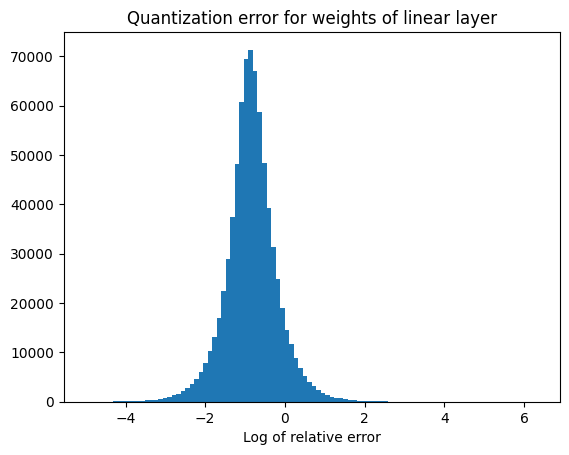

In [3]:
from torchvision import models
from quantize_model import create_quantized_model
from quantize_linear import QuantizedPermutationNoiseLinear

model = models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1).cuda()
quantized_model = create_quantized_model(
    model,
    layer_type=QuantizedPermutationNoiseLinear,
    min_range=-8,
    max_range=7,
    show_plot=True
).cuda()

In [5]:
from utils import count_parameters_by_type
count_parameters_by_type(model)

encoder.layers.encoder_layer_X.mlp.X.weight: 56.62M
encoder.layers.encoder_layer_X.self_attention.in_proj_weight: 21.23M
encoder.layers.encoder_layer_X.self_attention.out_proj.weight: 7.08M
heads.head.weight: 0.77M
conv_proj.weight: 0.59M
encoder.pos_embedding: 0.15M
encoder.layers.encoder_layer_X.mlp.X.bias: 0.05M
encoder.layers.encoder_layer_X.self_attention.in_proj_bias: 0.03M
encoder.layers.encoder_layer_X.ln_X.weight: 0.02M
encoder.layers.encoder_layer_X.ln_X.bias: 0.02M
encoder.layers.encoder_layer_X.self_attention.out_proj.bias: 0.01M
heads.head.bias: 0.00M
class_token: 0.00M
conv_proj.bias: 0.00M
encoder.ln.weight: 0.00M
encoder.ln.bias: 0.00M


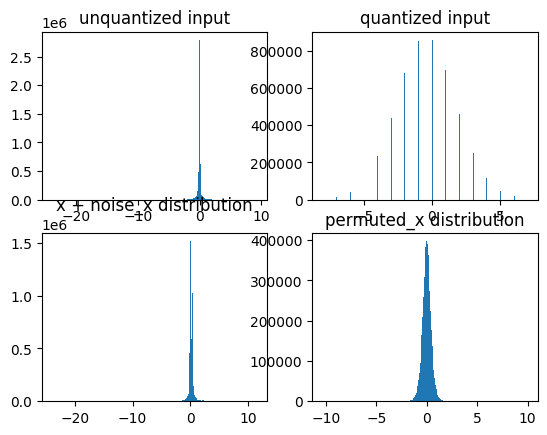

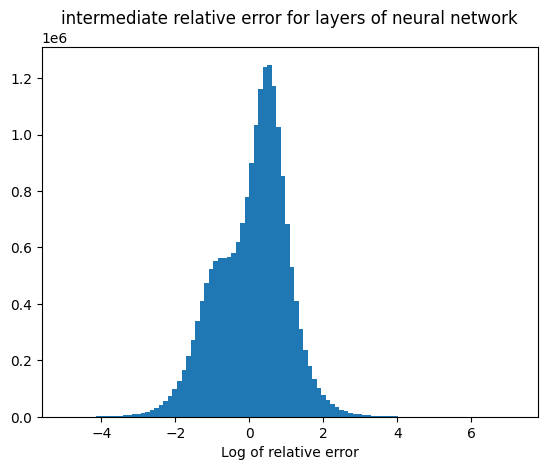

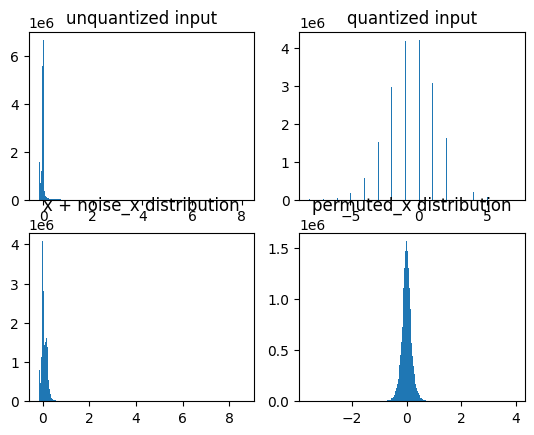

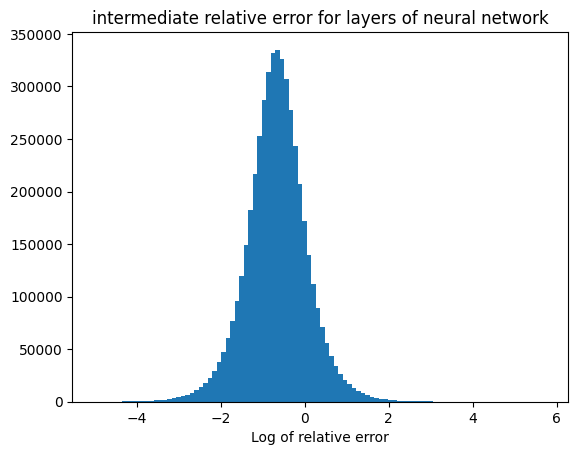

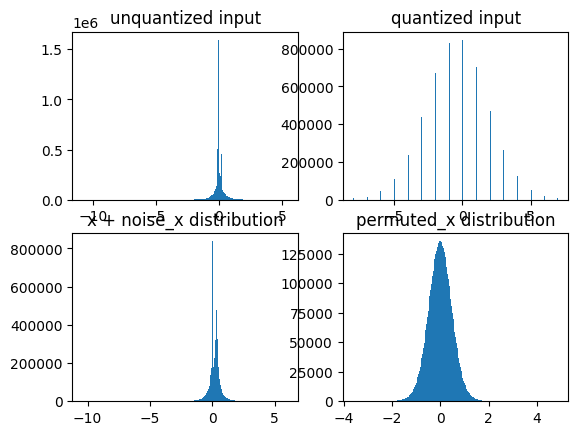

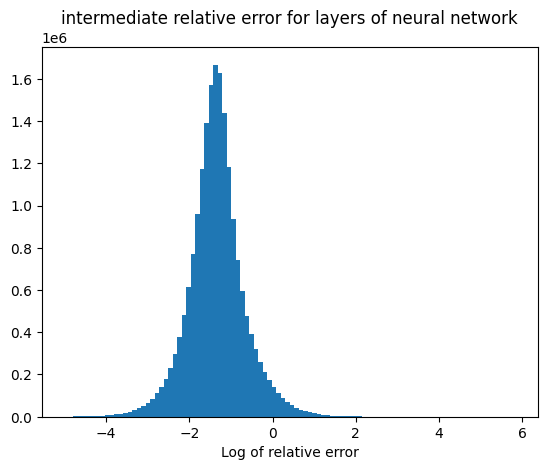

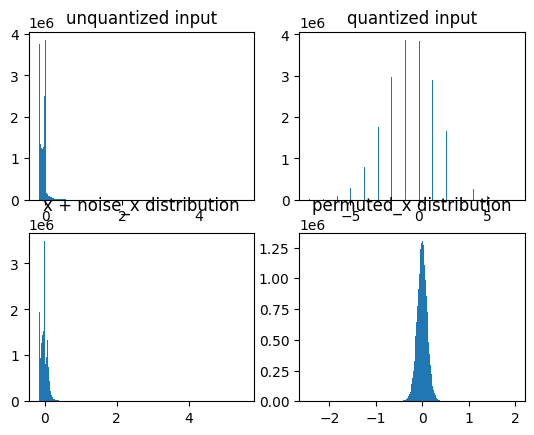

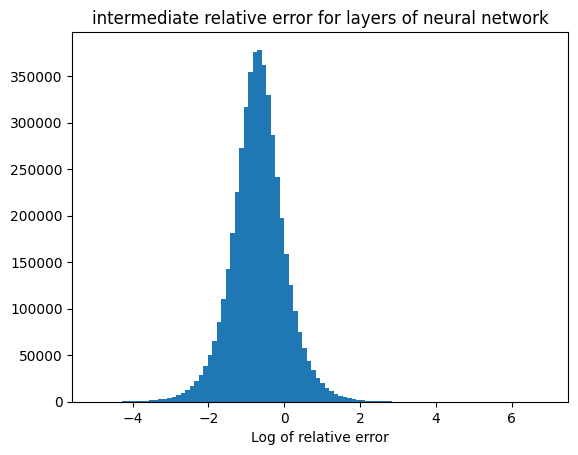

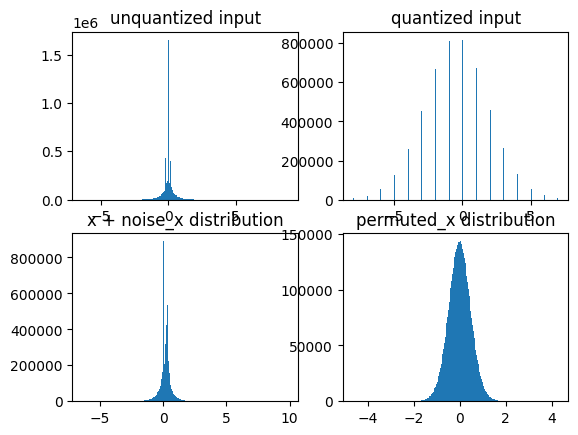

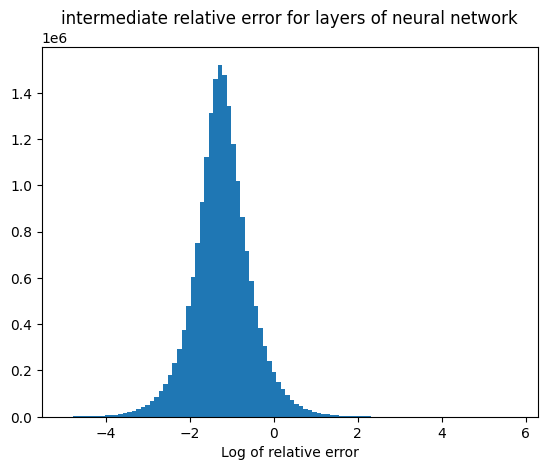

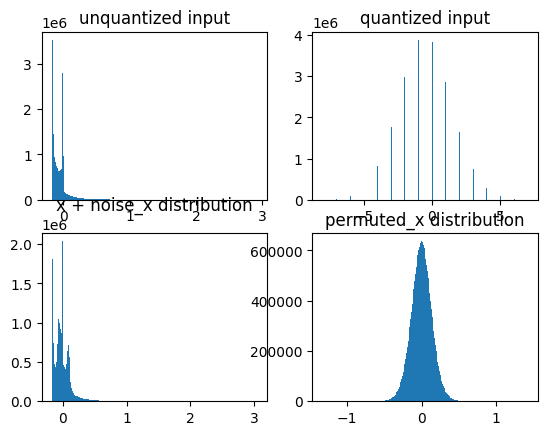

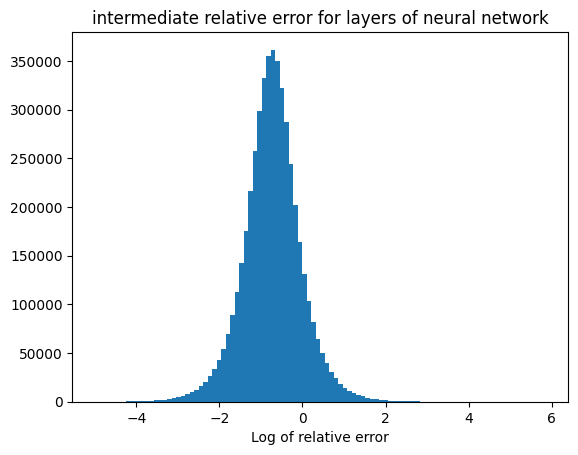

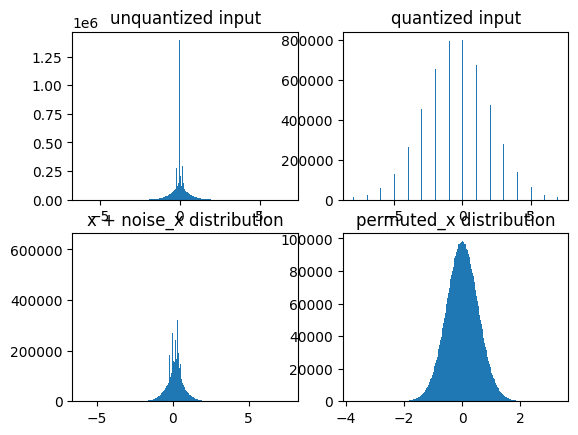

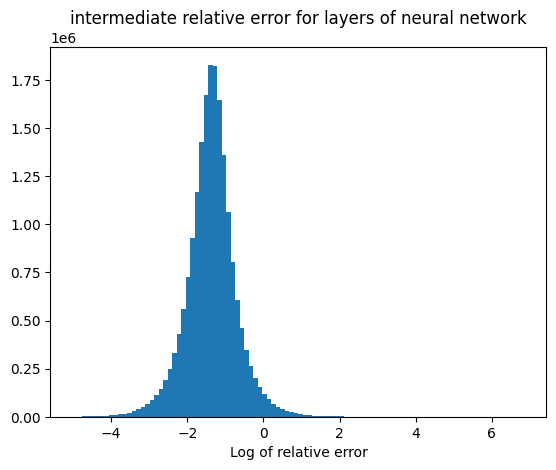

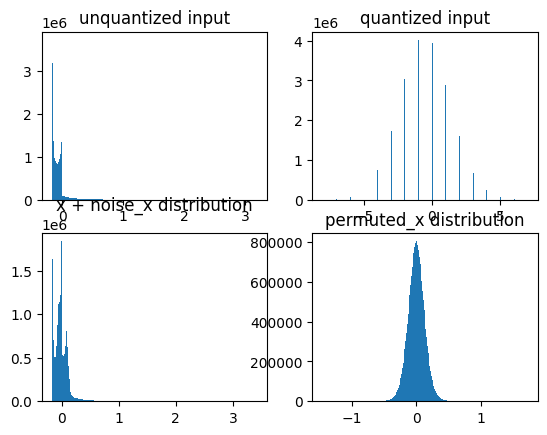

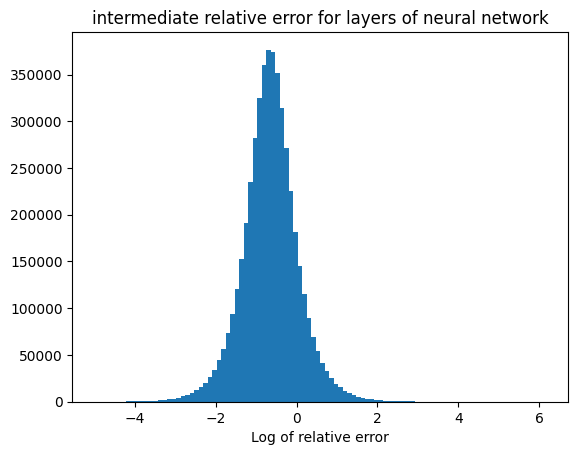

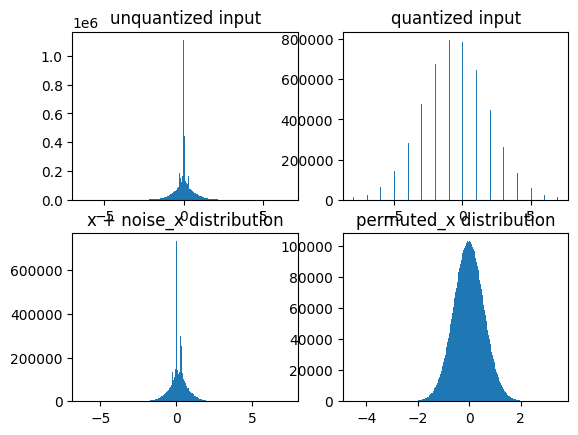

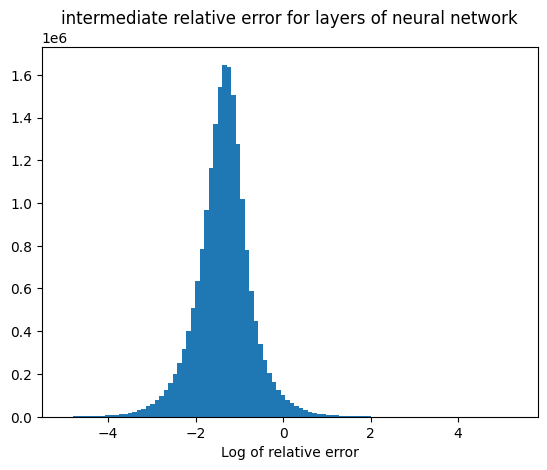

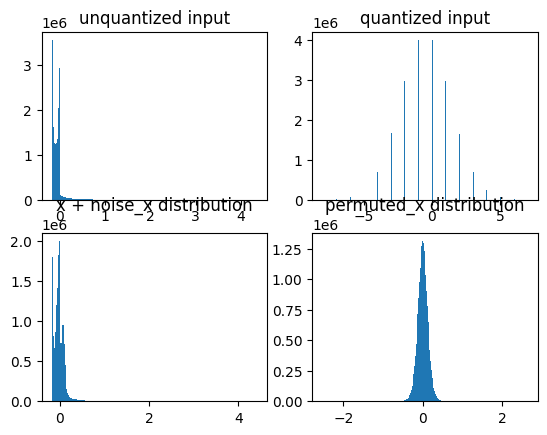

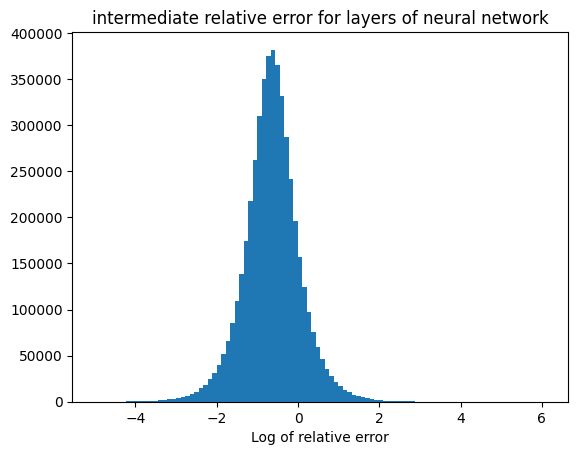

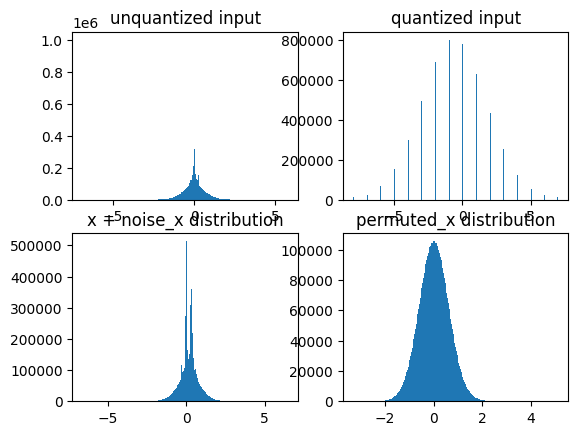

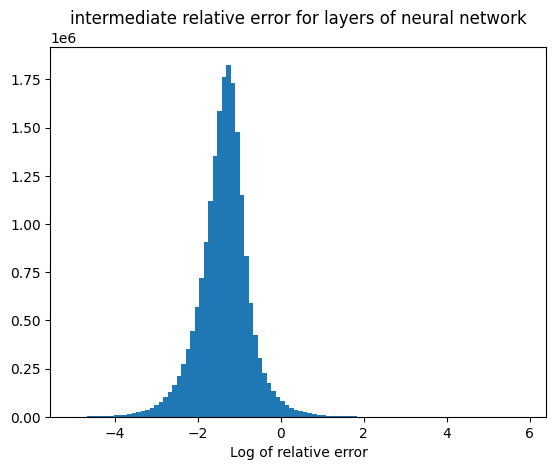

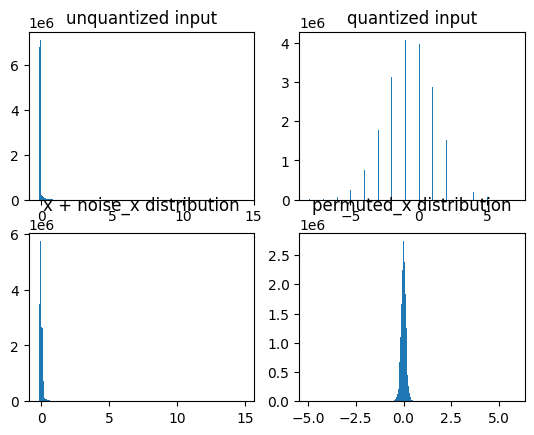

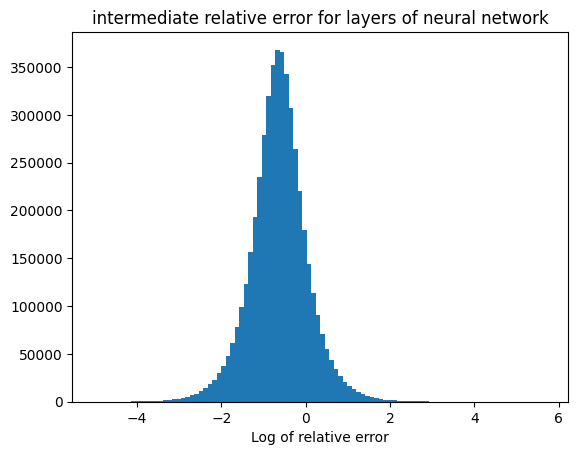

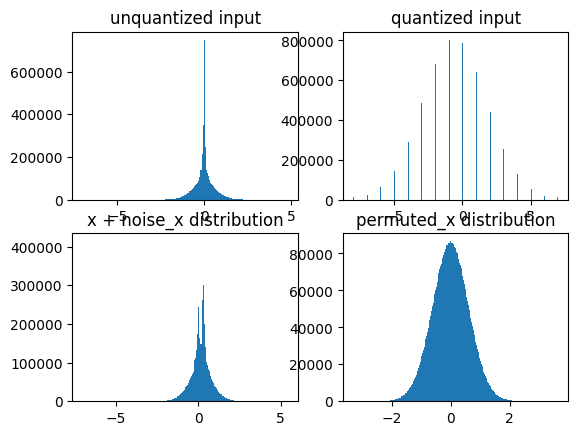

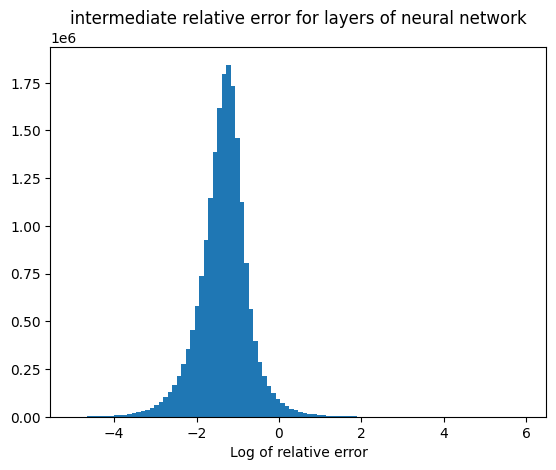

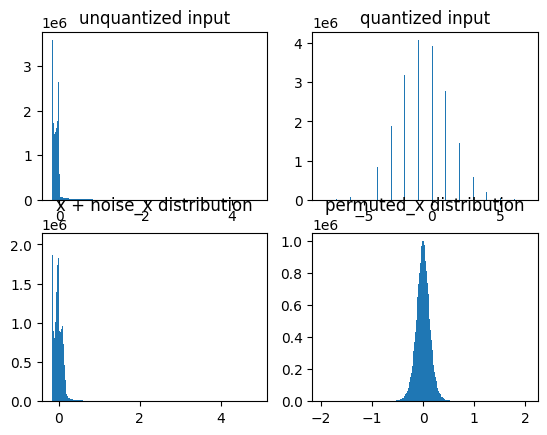

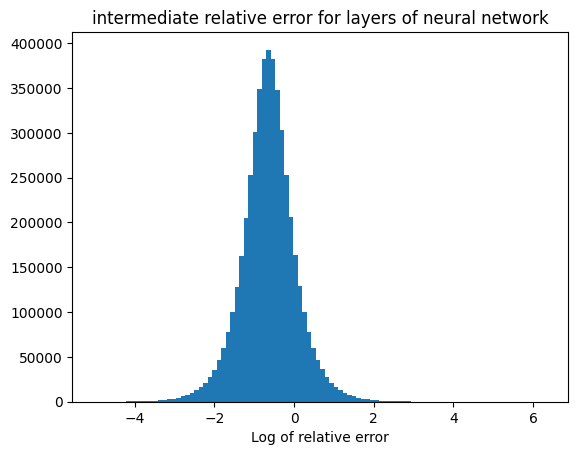

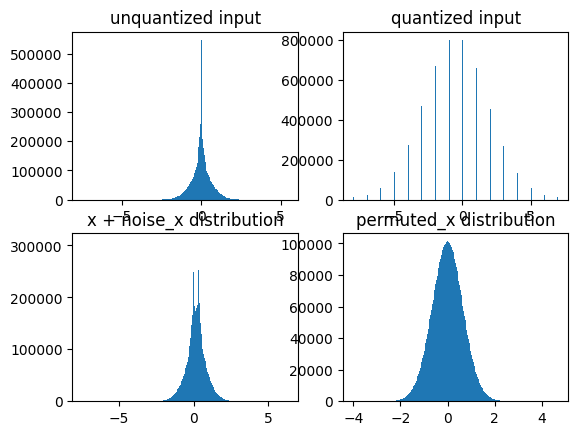

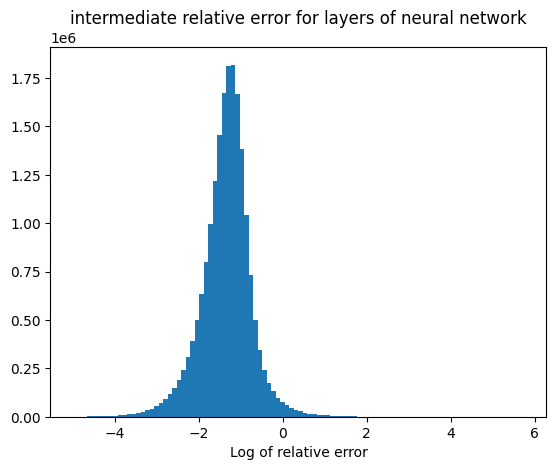

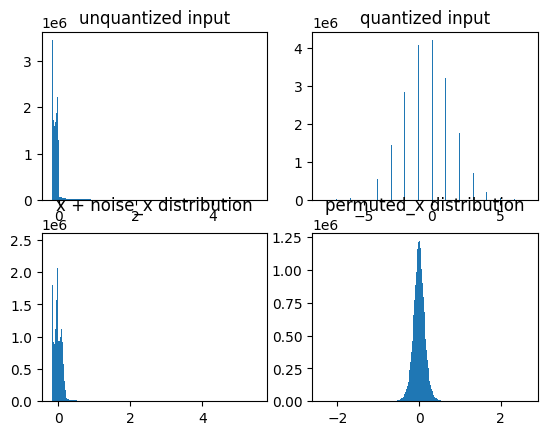

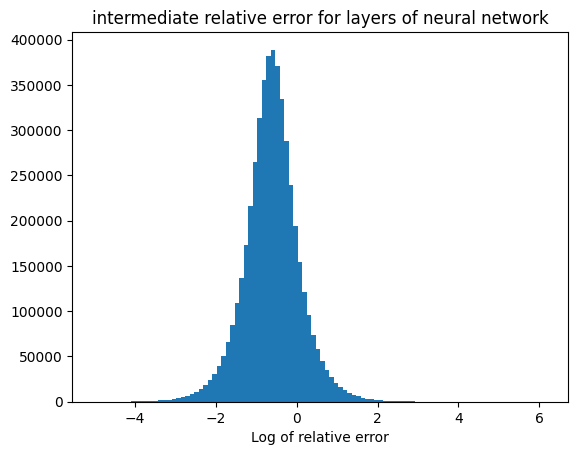

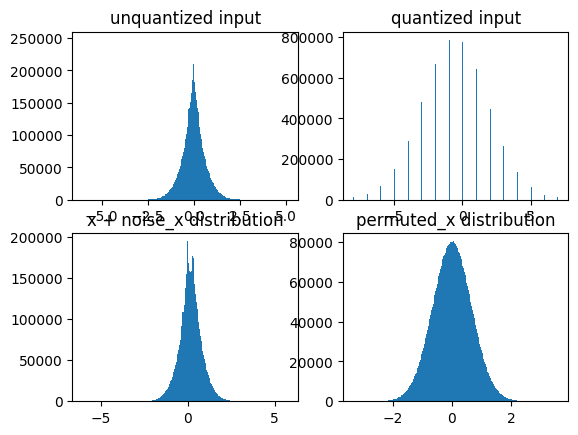

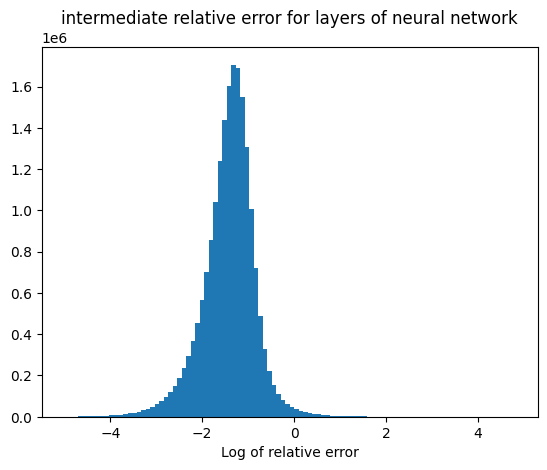

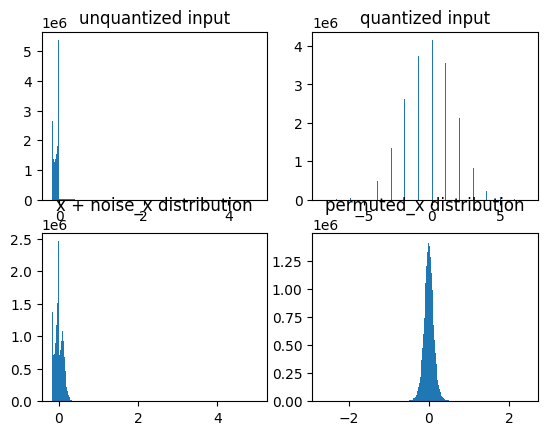

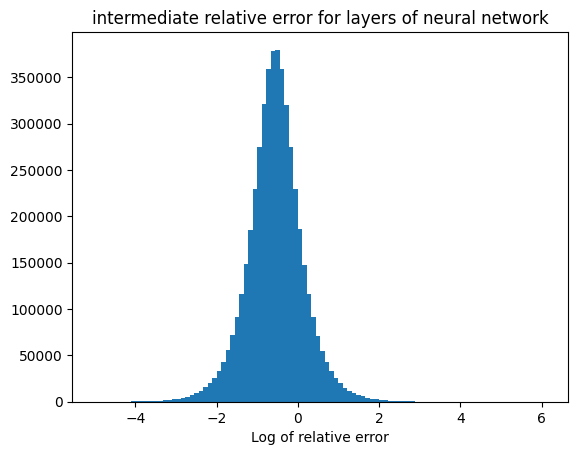

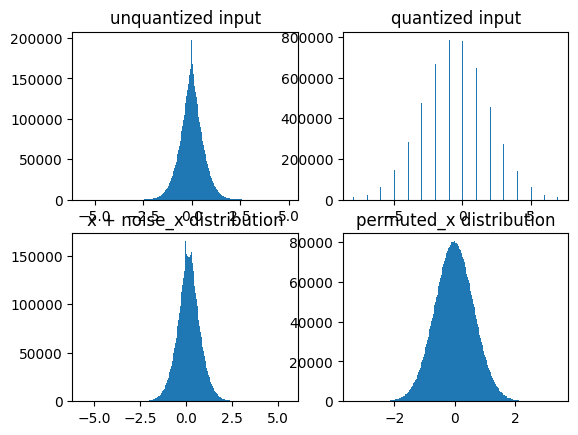

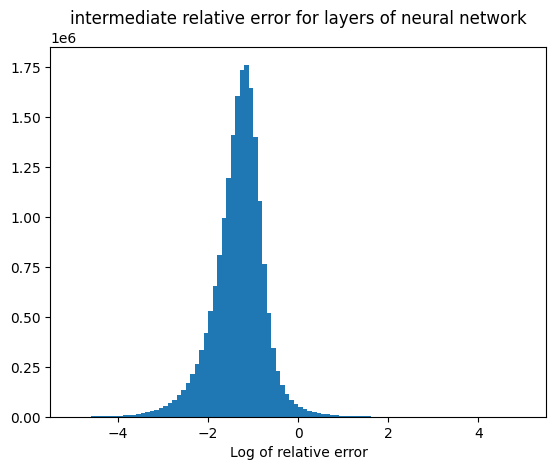

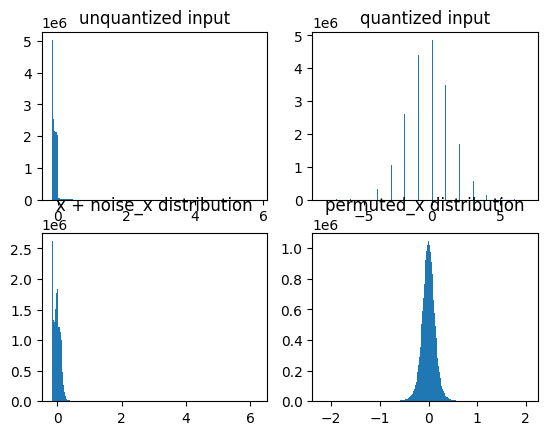

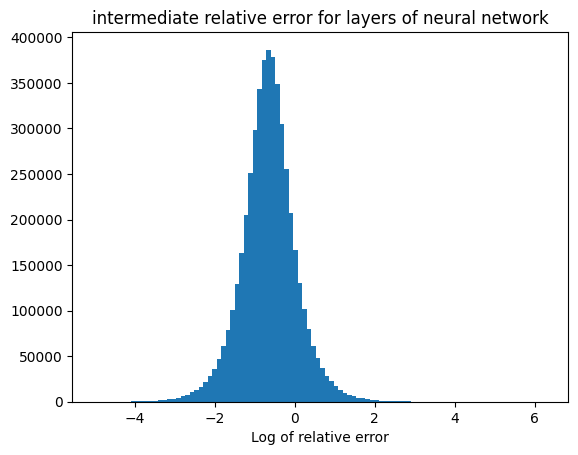

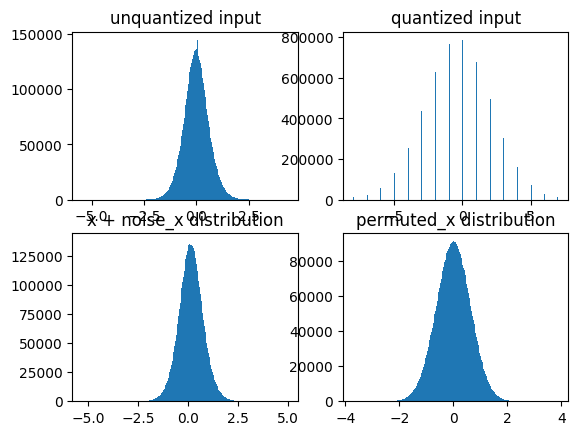

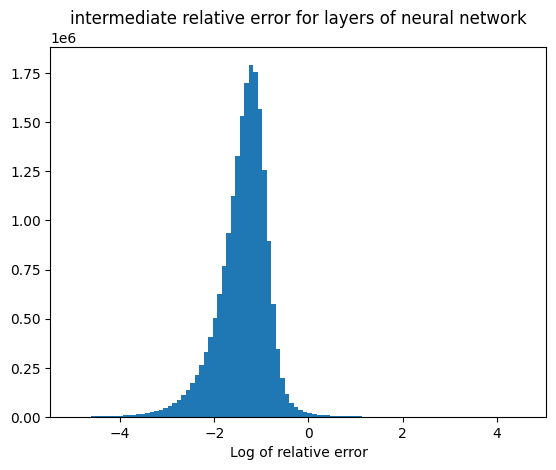

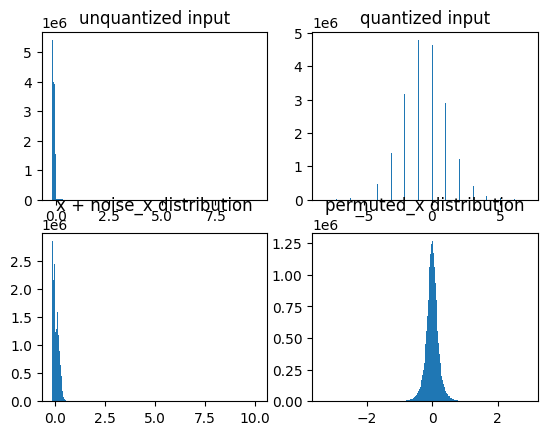

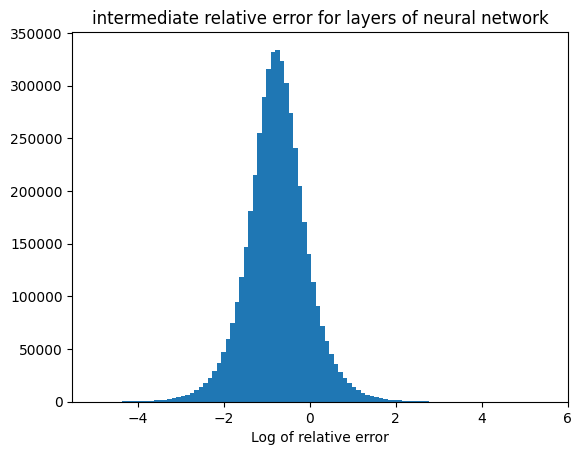

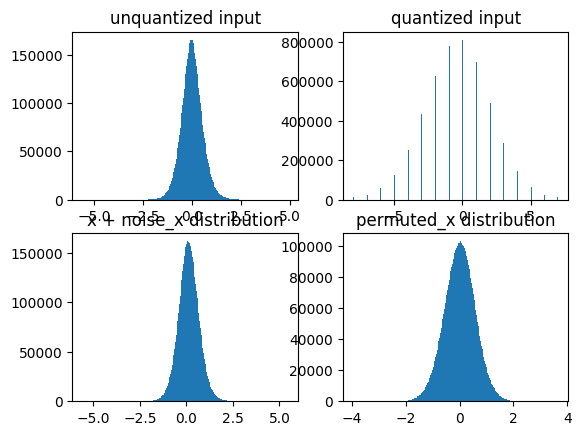

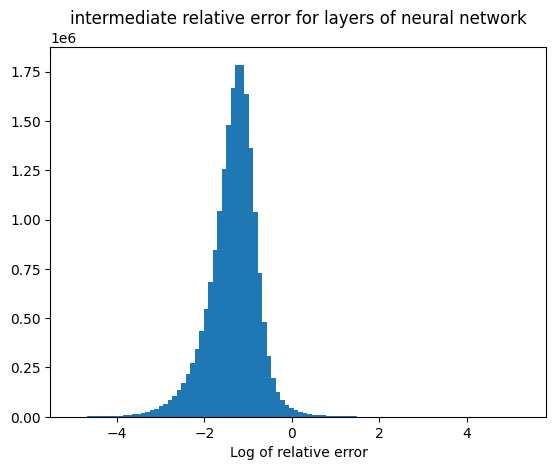

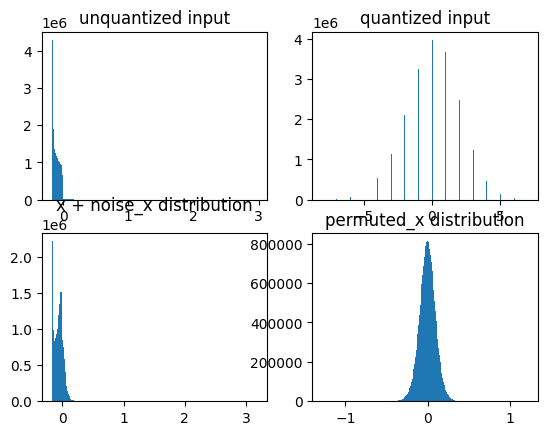

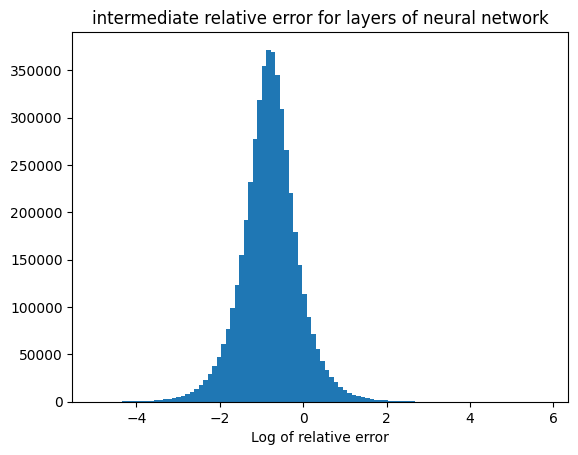

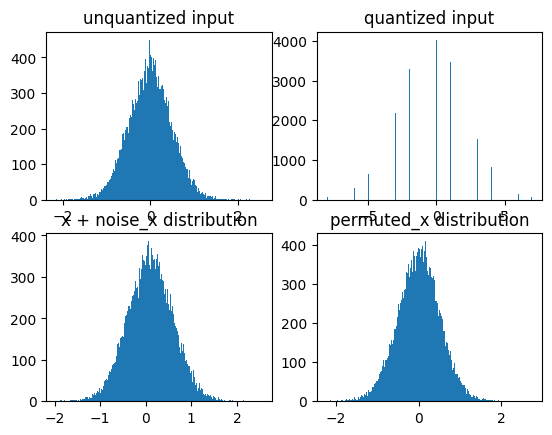

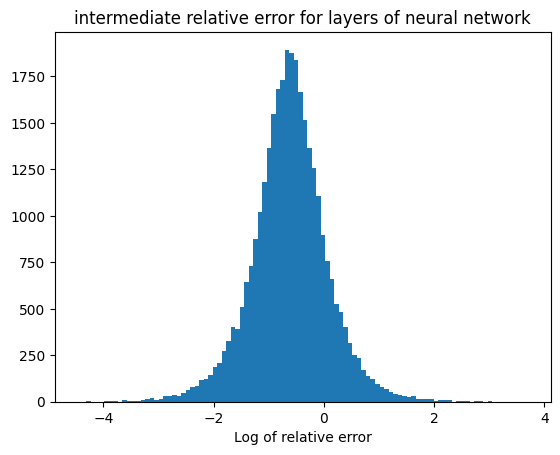

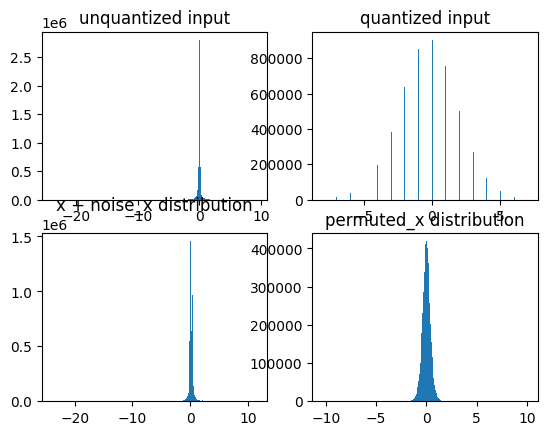

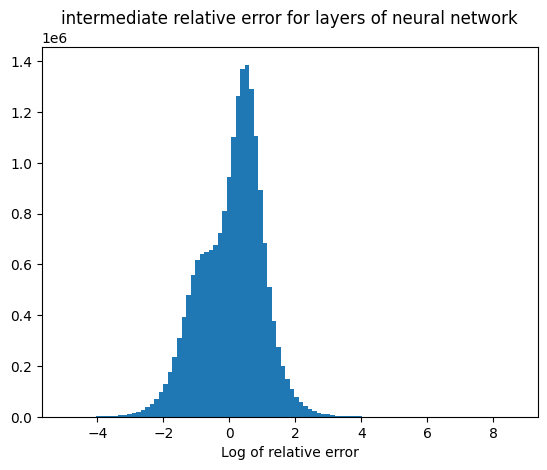

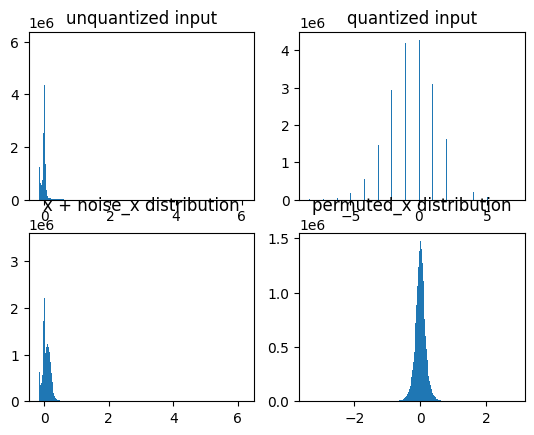

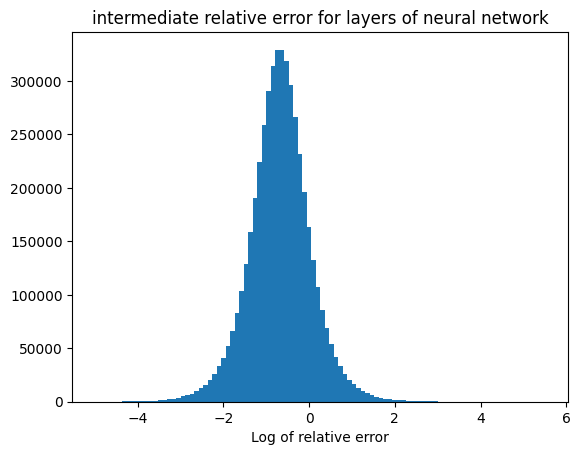

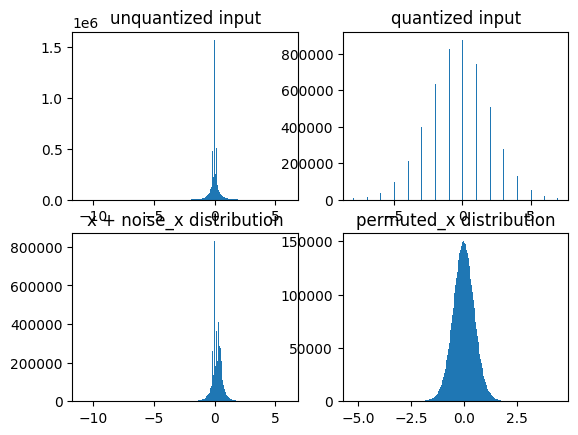

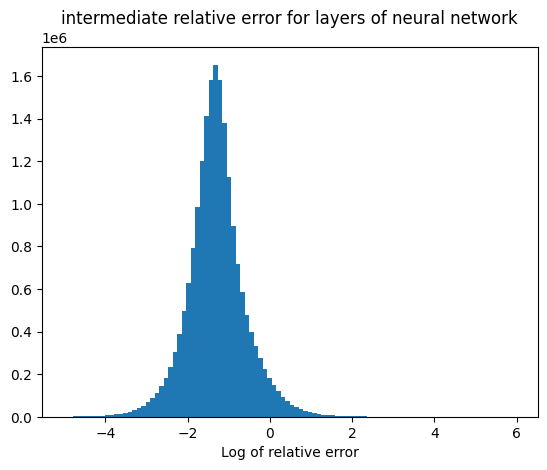

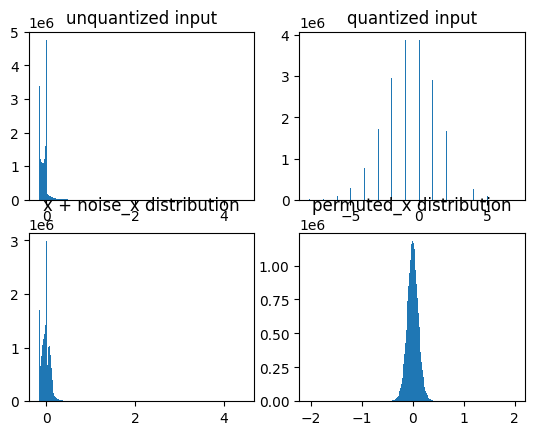

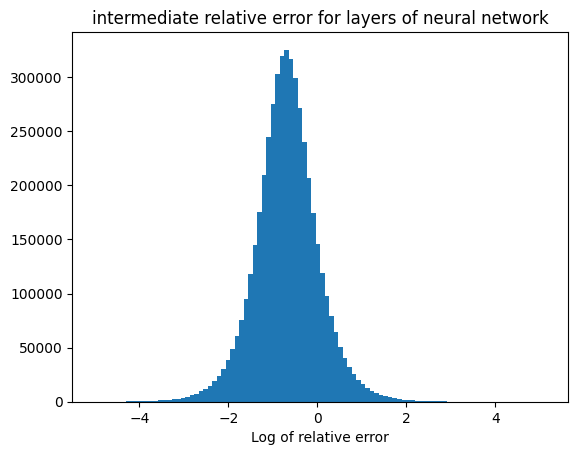

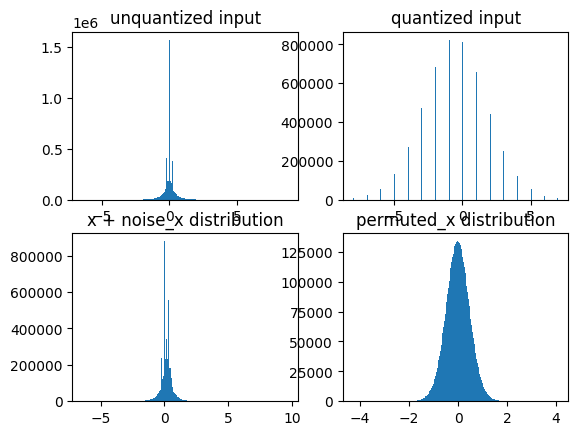

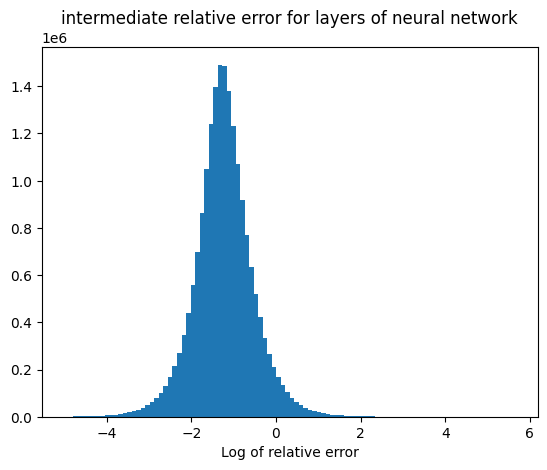

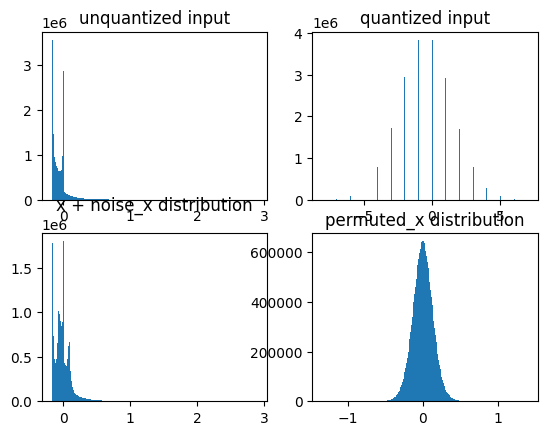

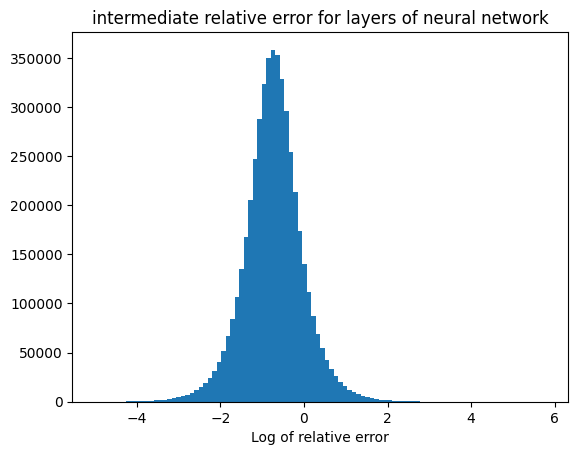

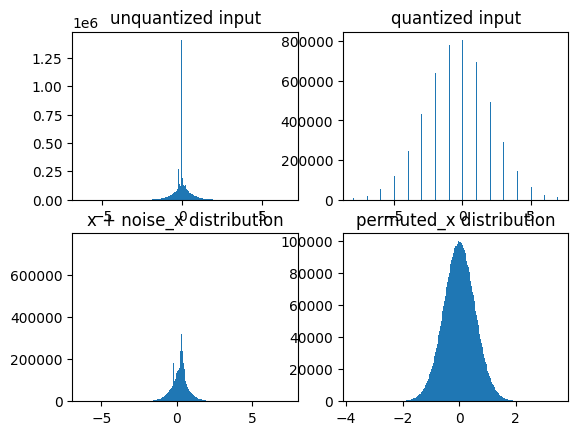

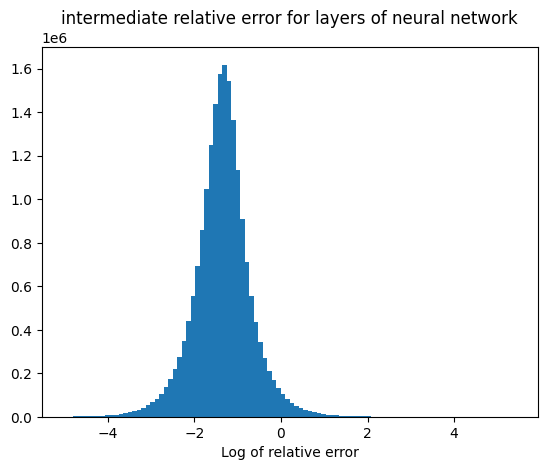

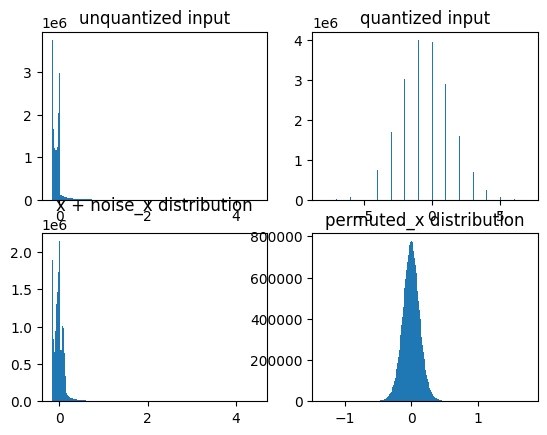

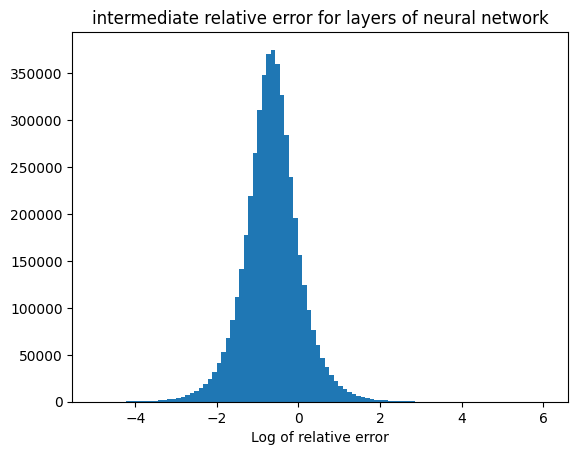

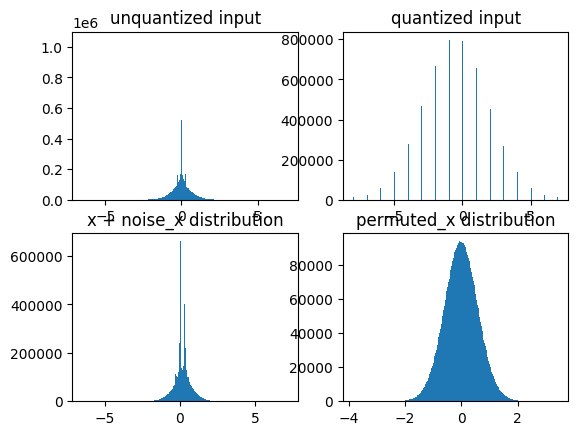

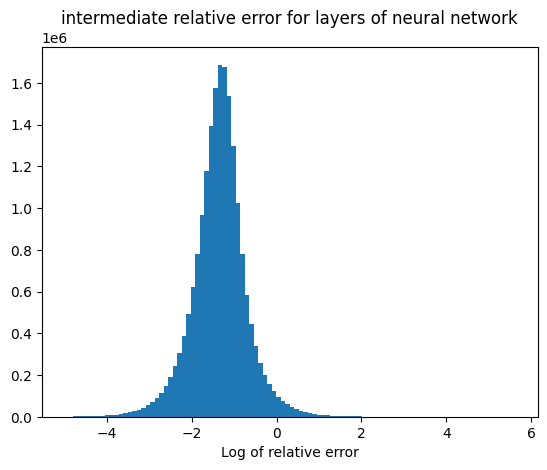

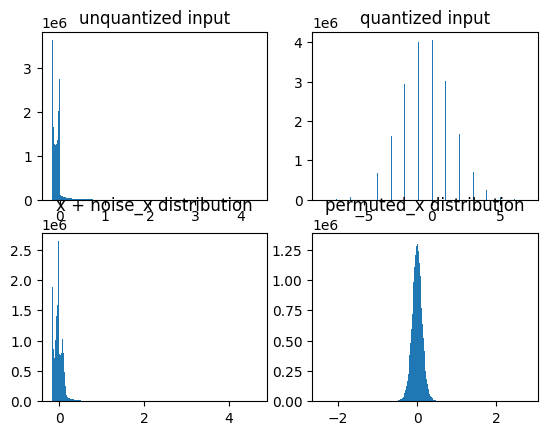

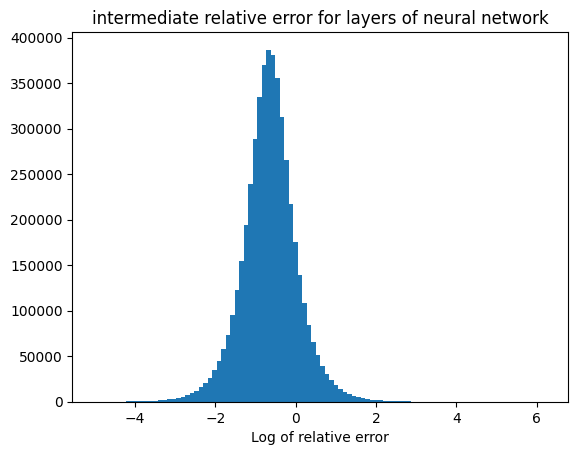

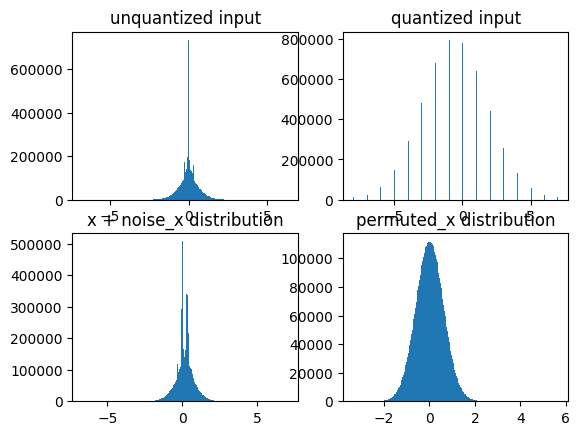

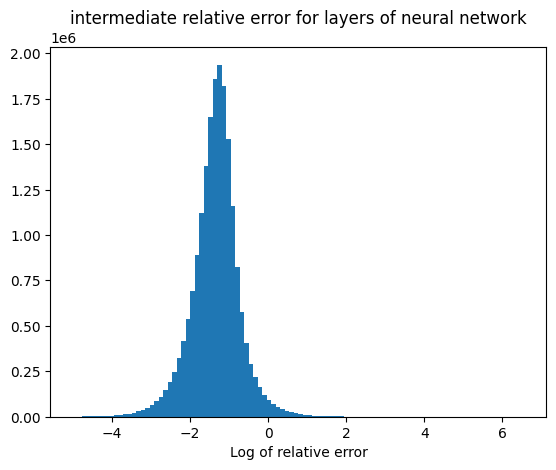

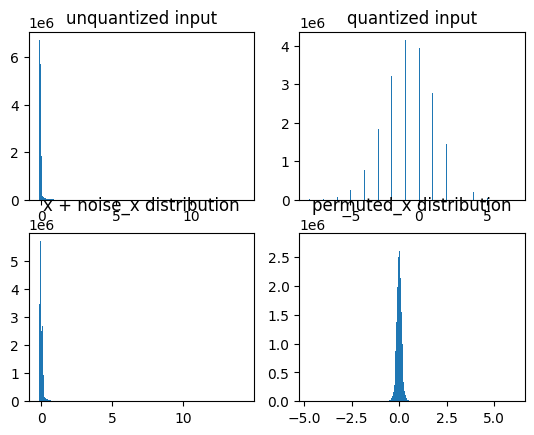

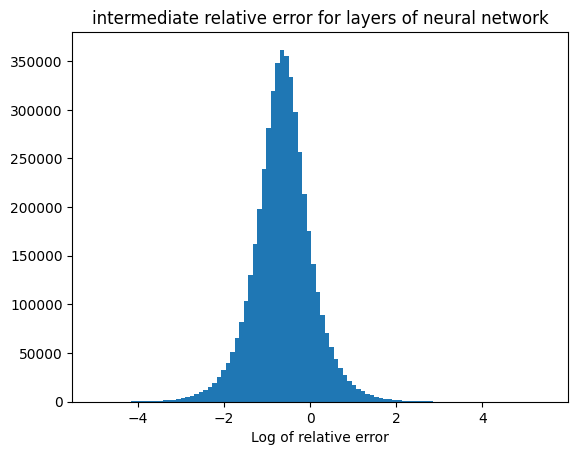

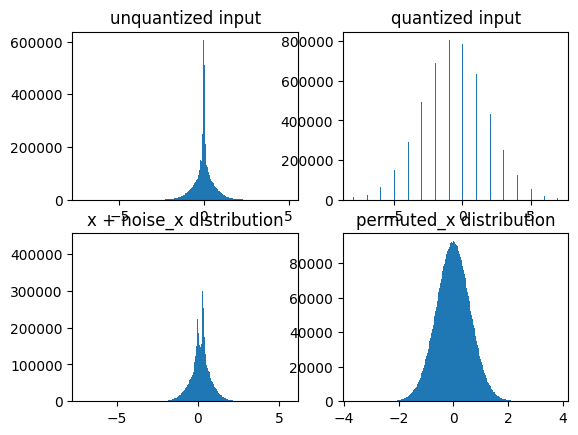

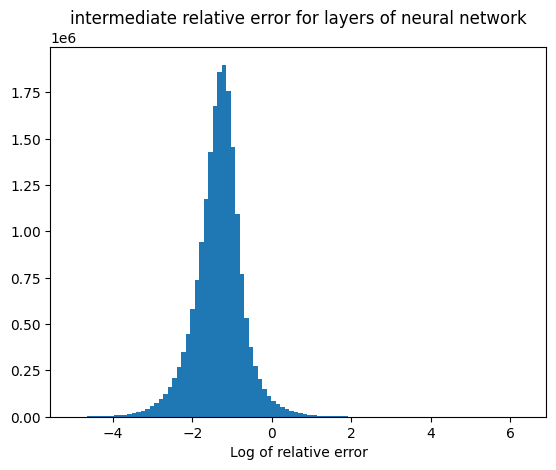

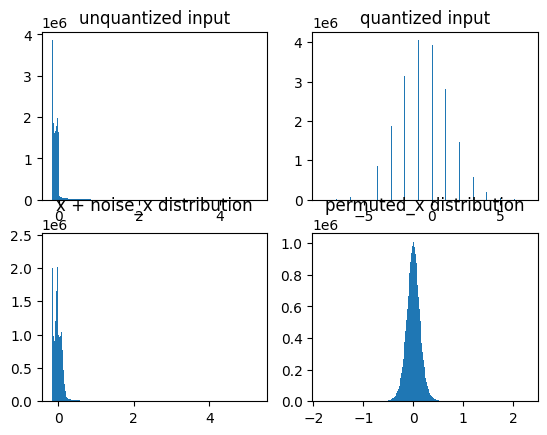

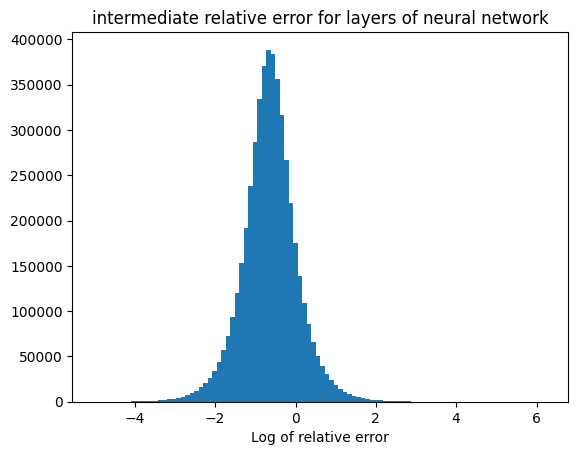

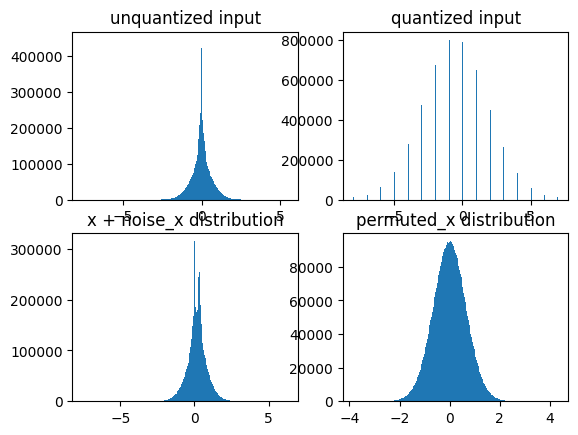

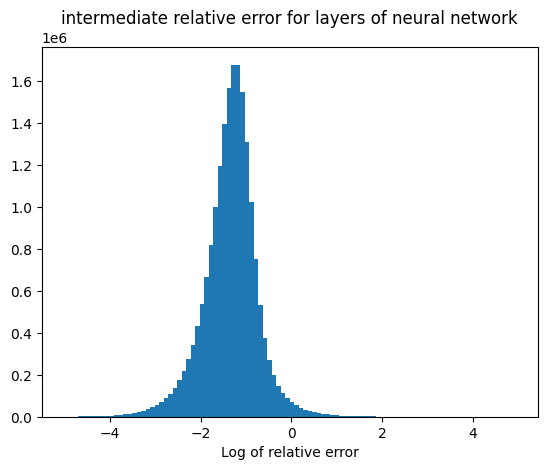

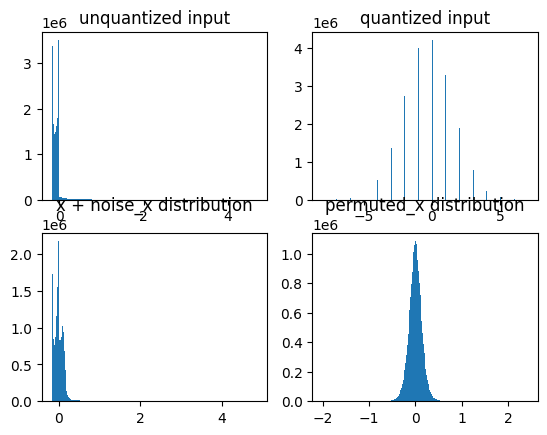

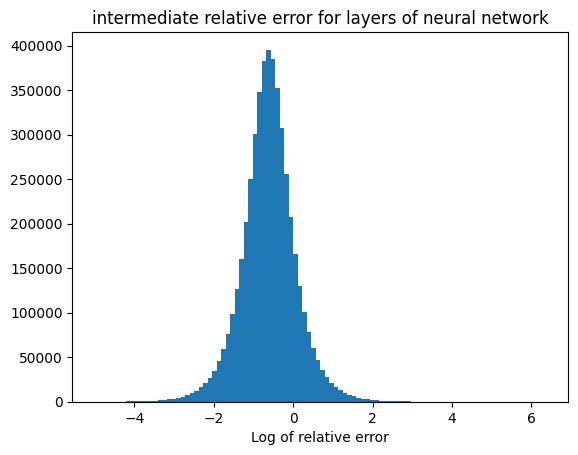

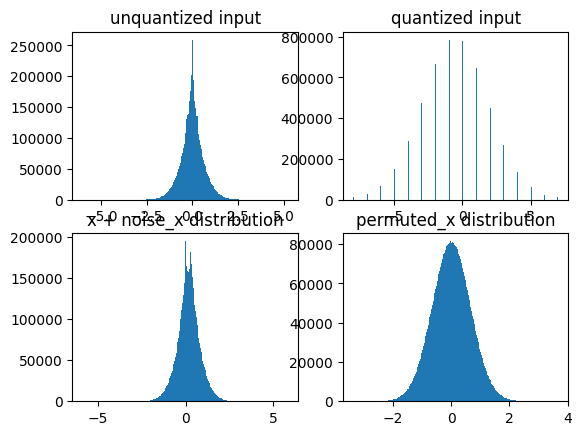

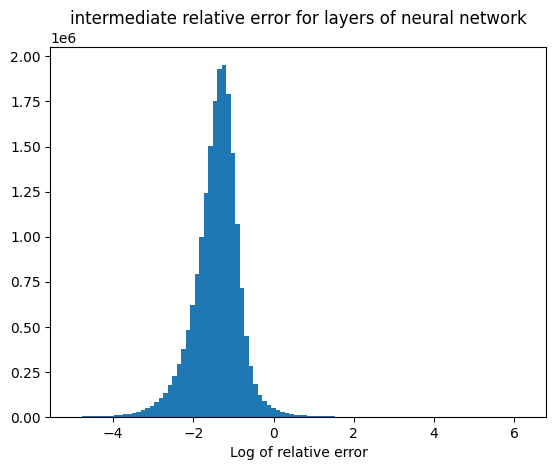

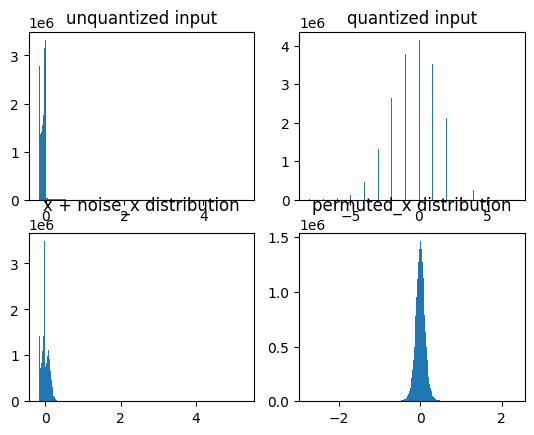

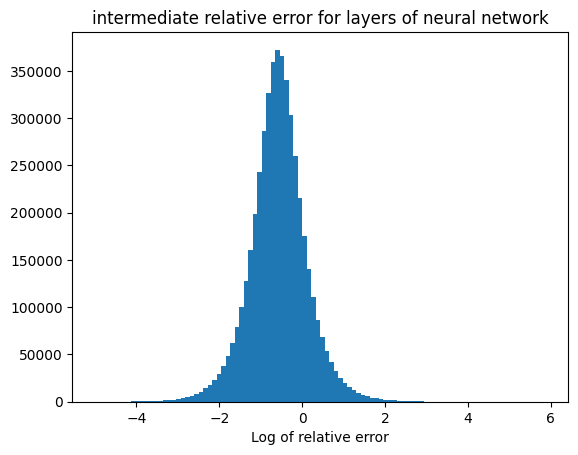

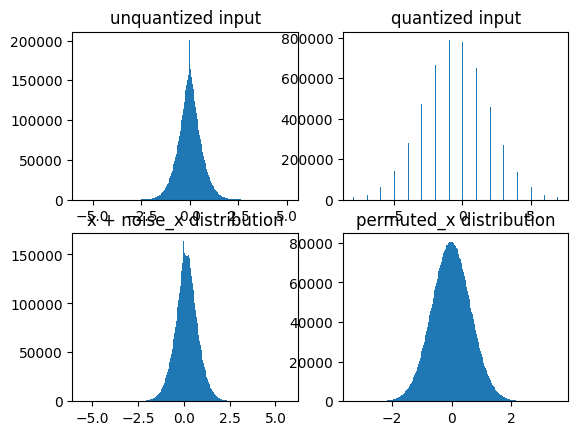

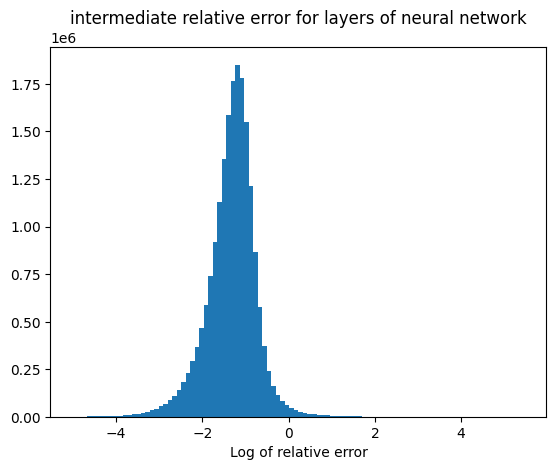

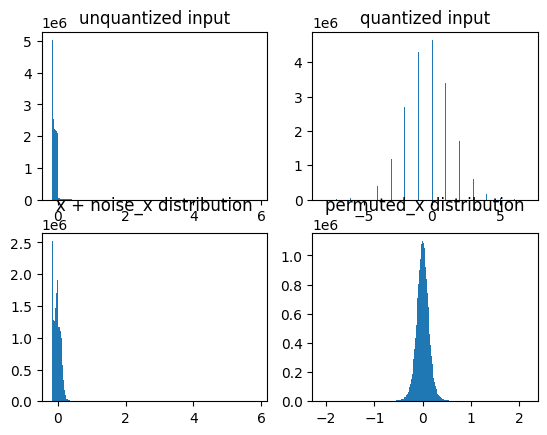

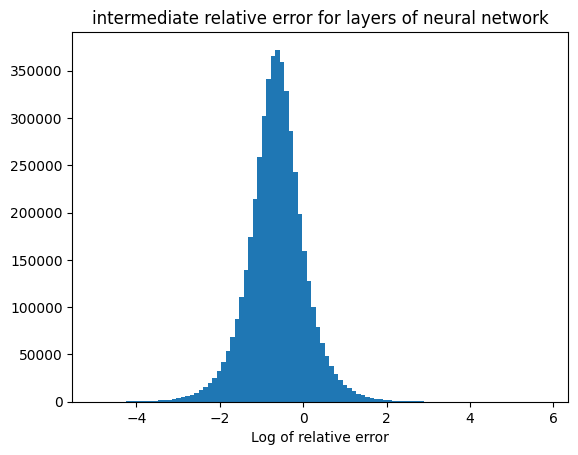

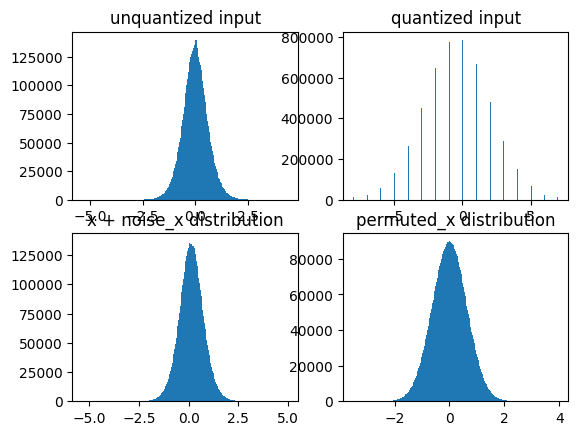

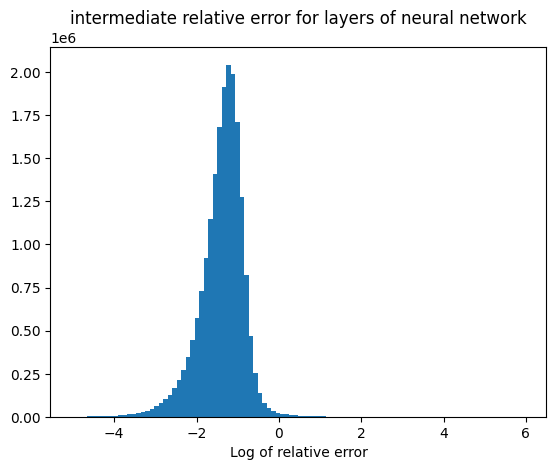

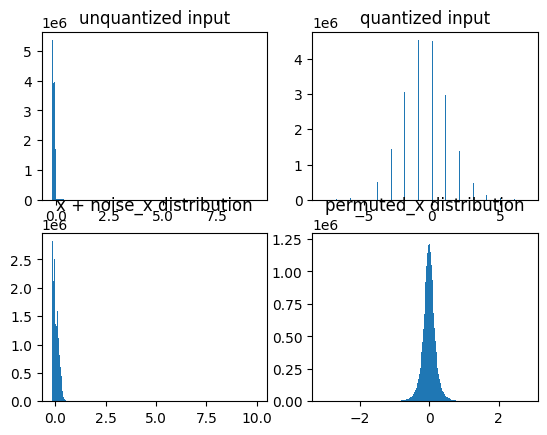

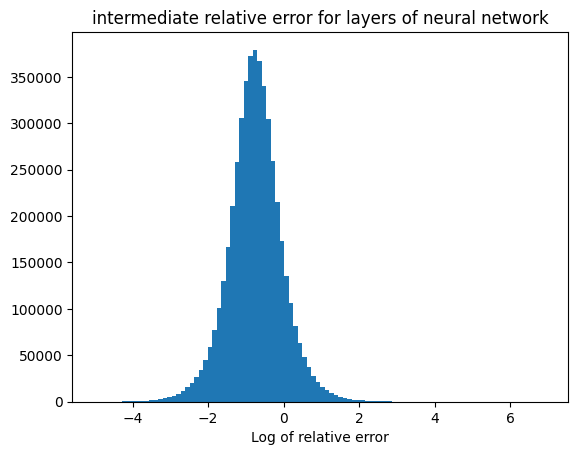

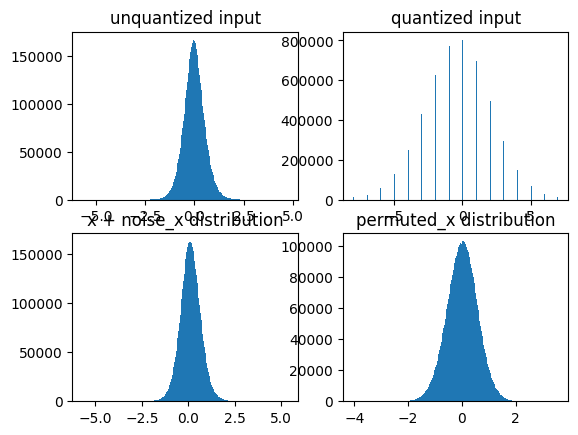

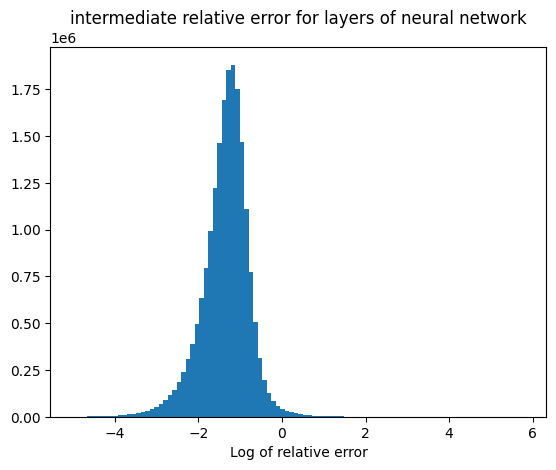

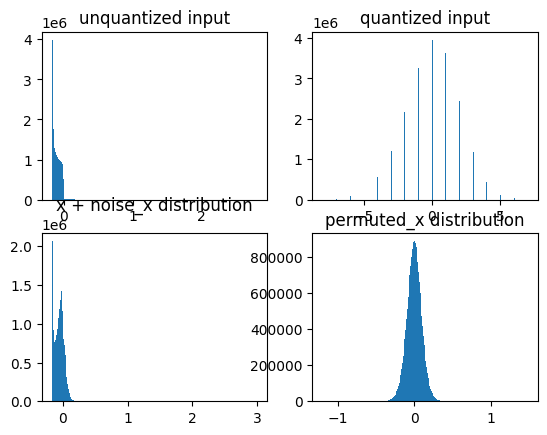

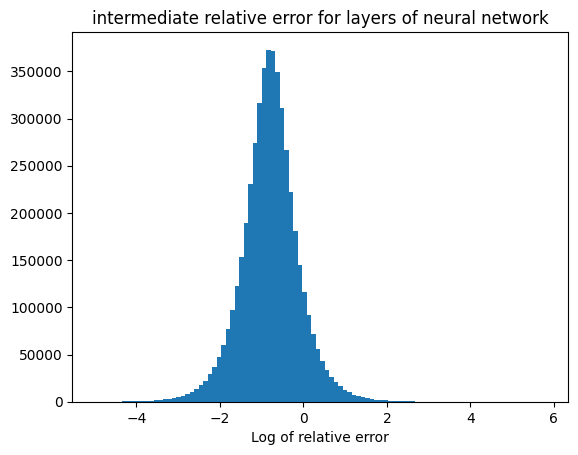

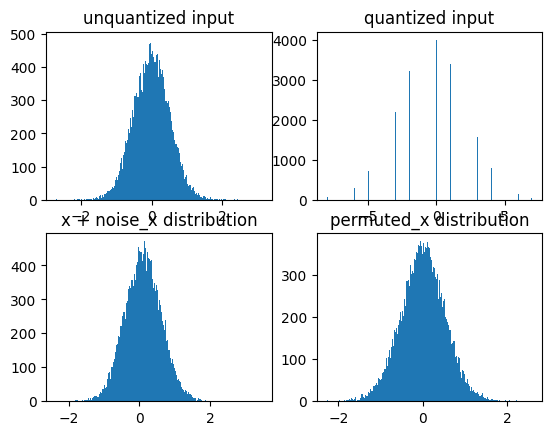

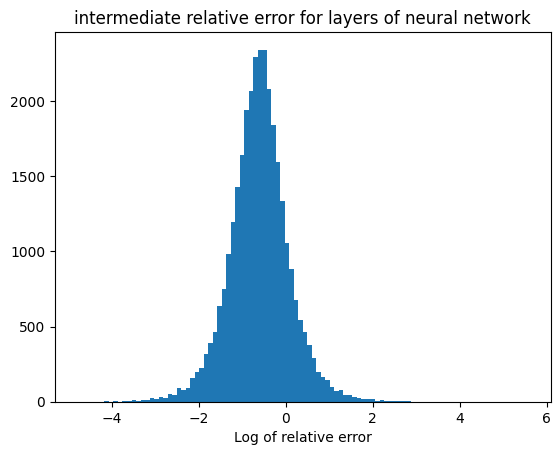

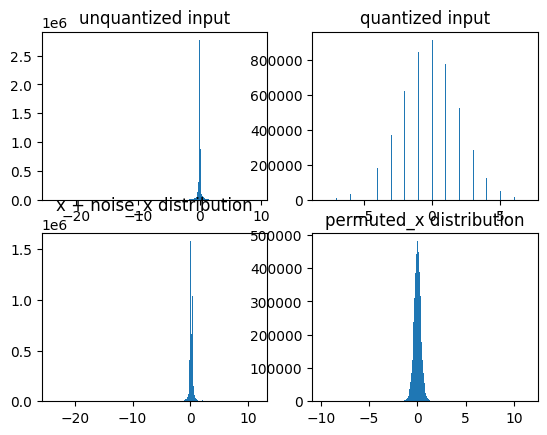

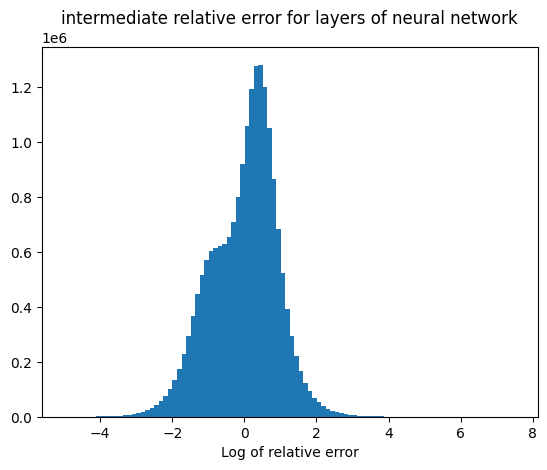

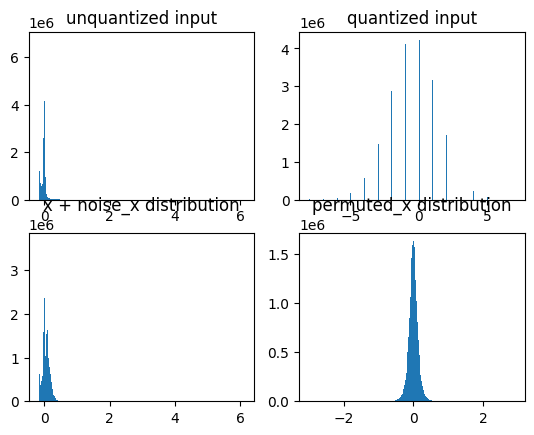

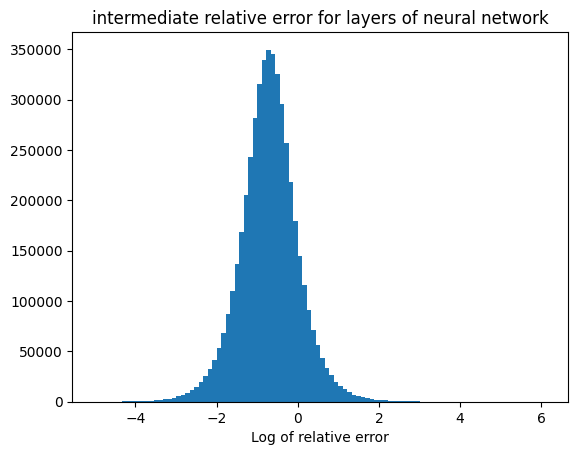

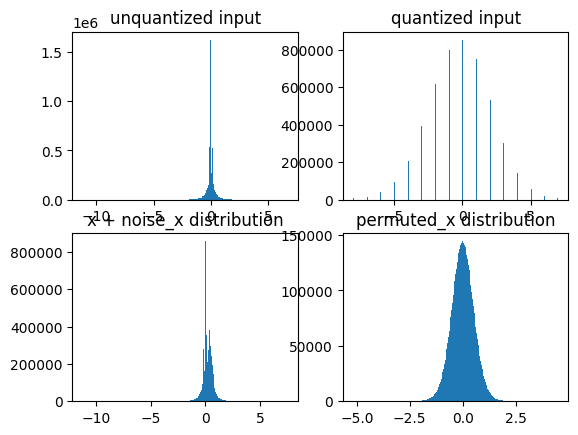

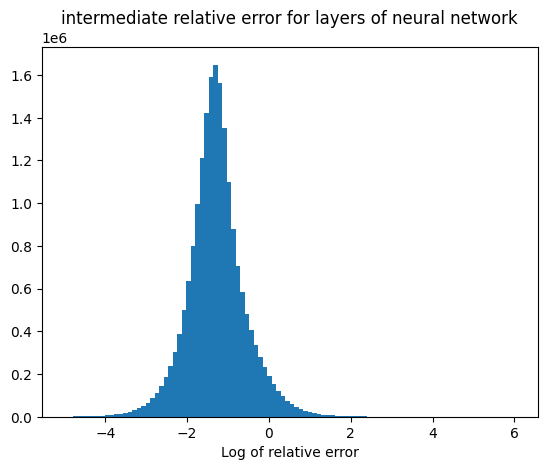

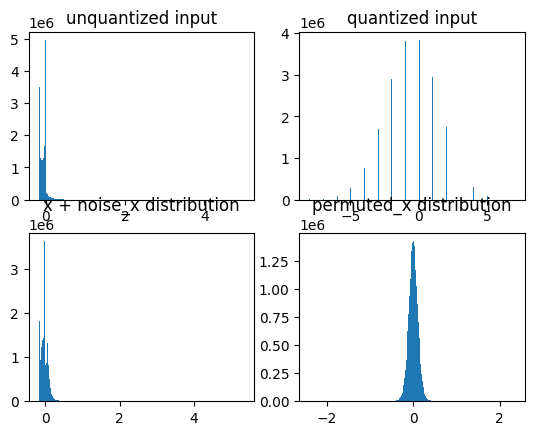

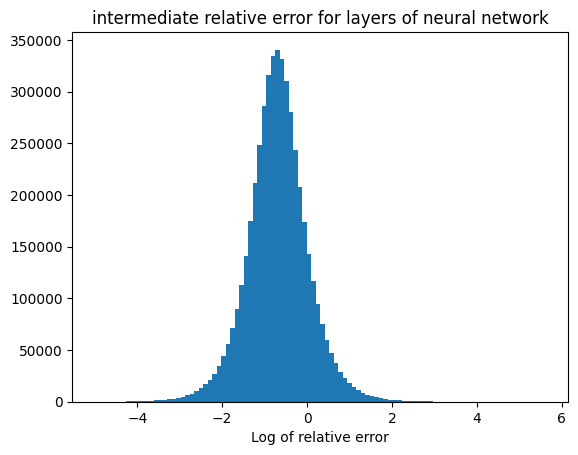

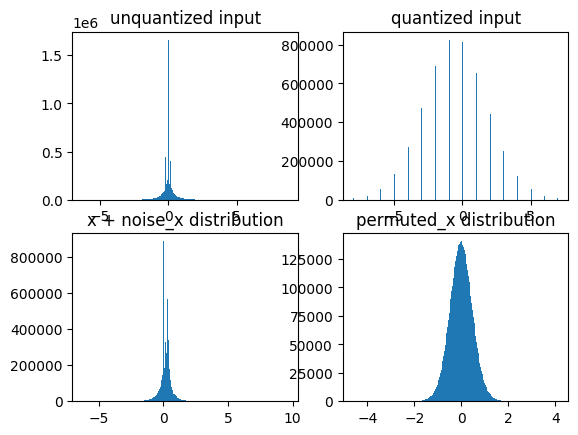

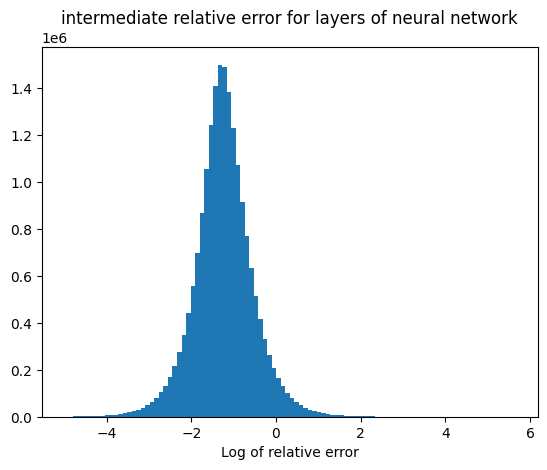

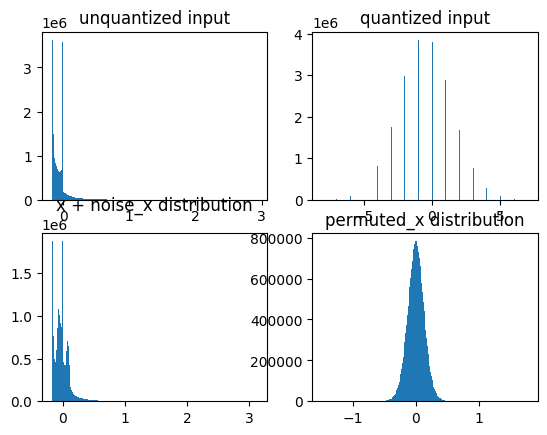

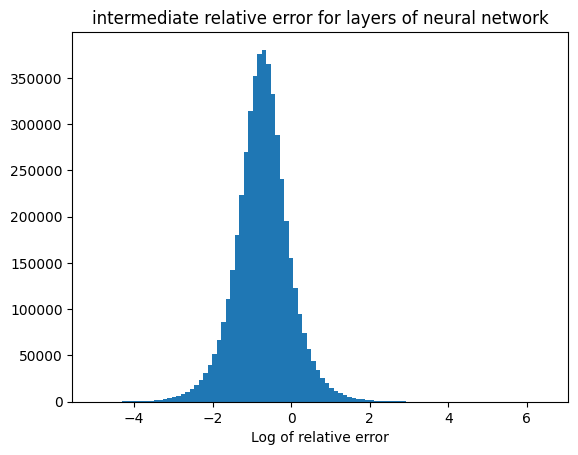

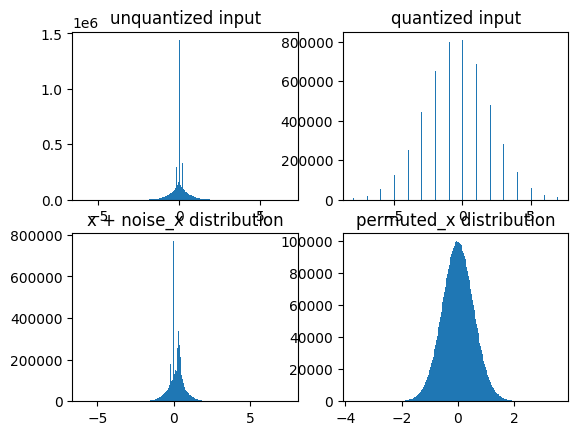

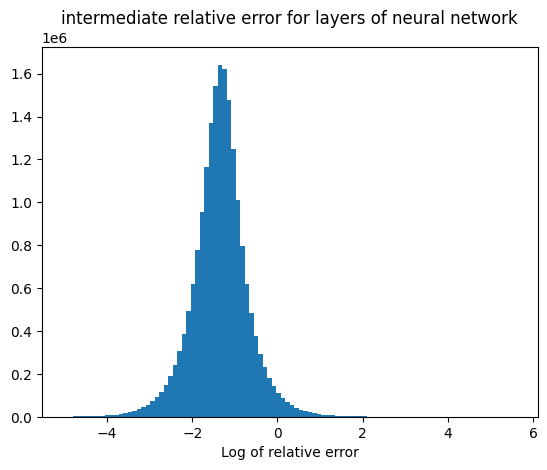

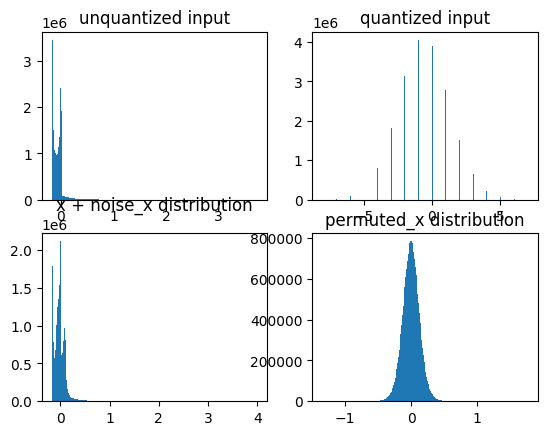

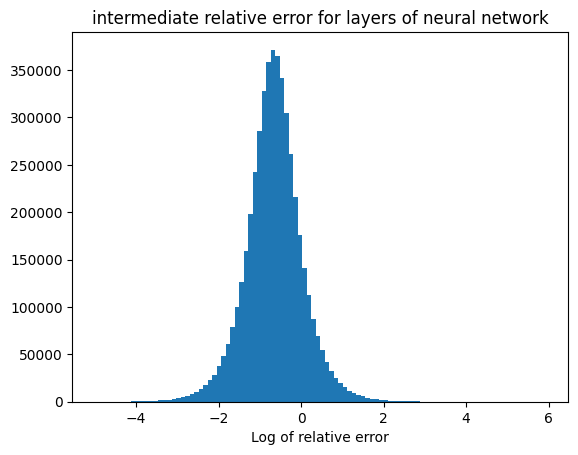

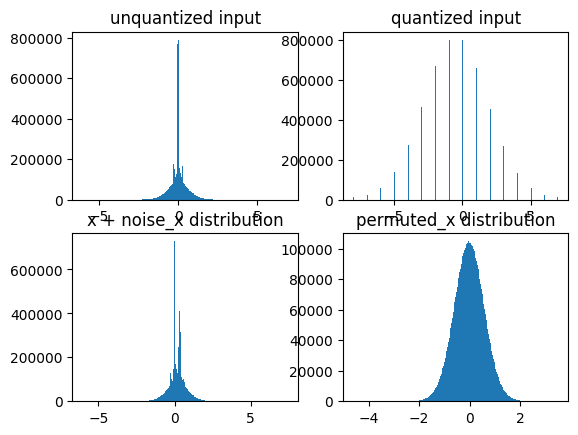

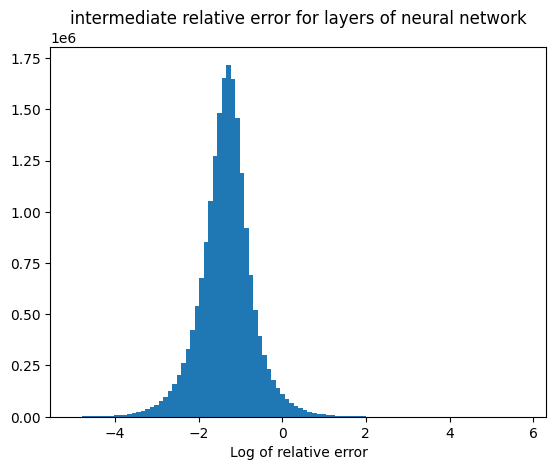

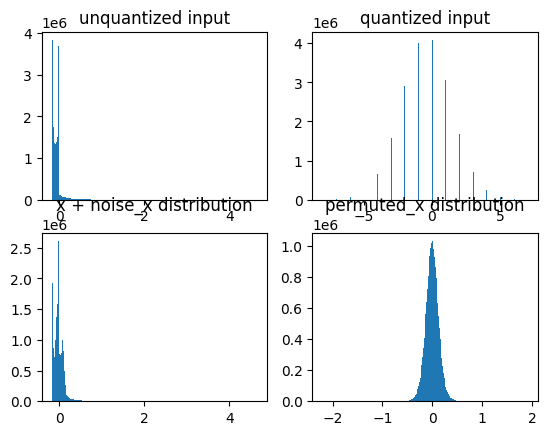

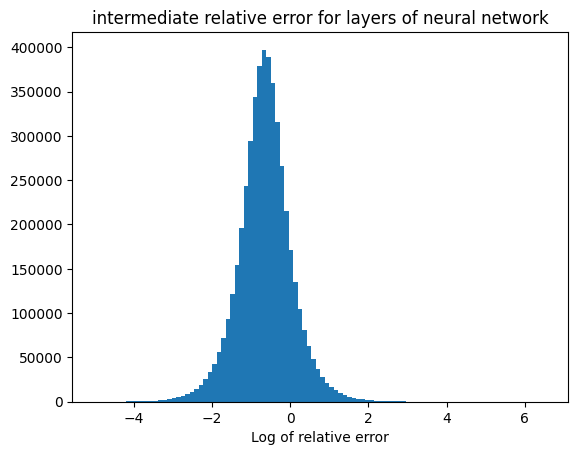

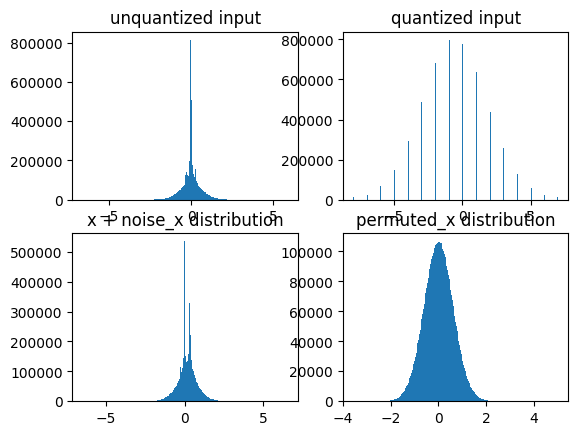

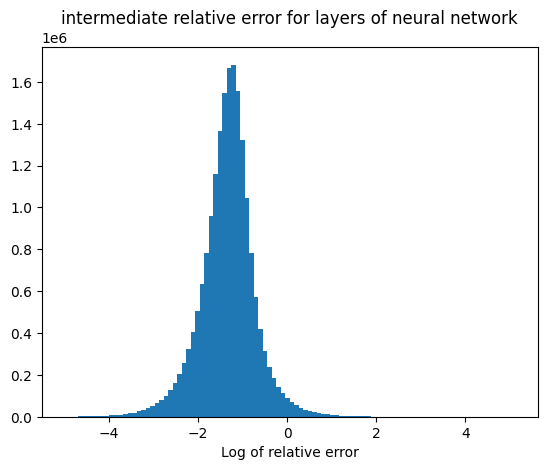

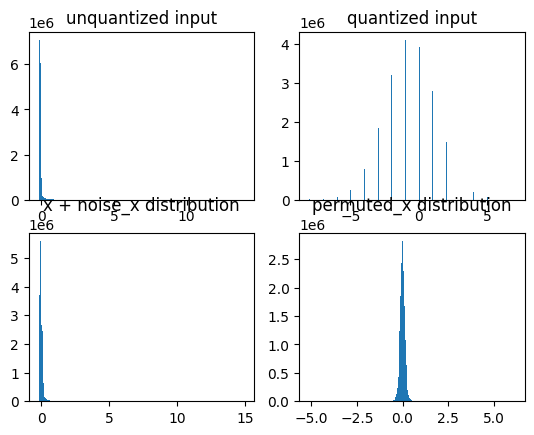

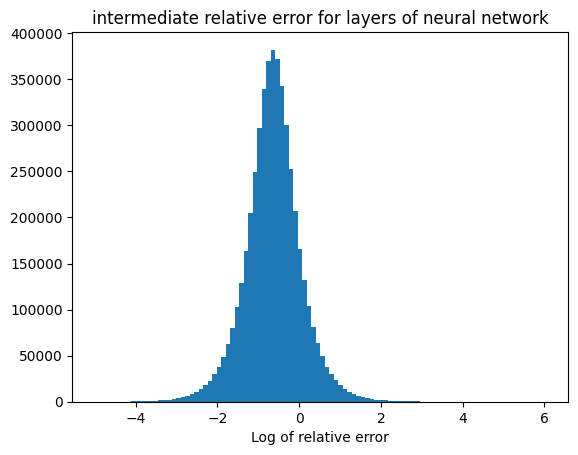

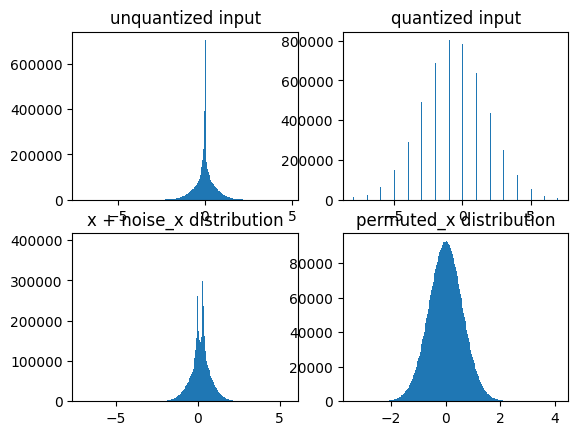

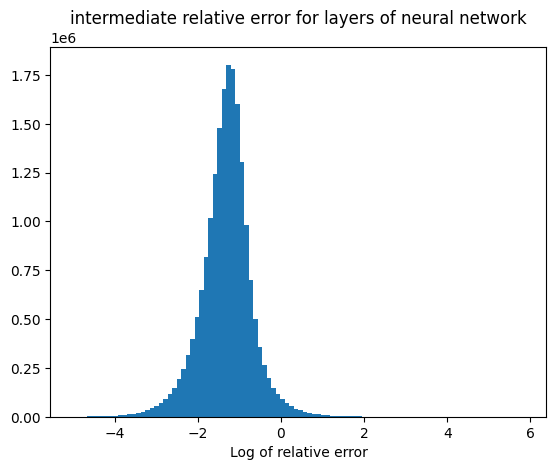

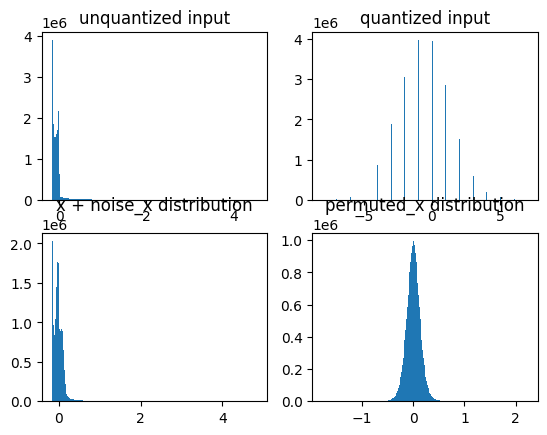

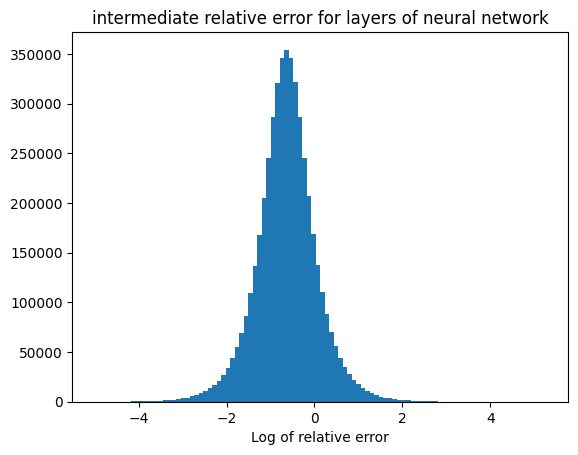

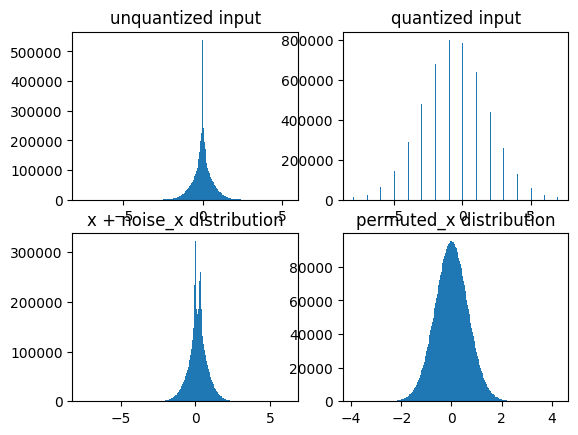

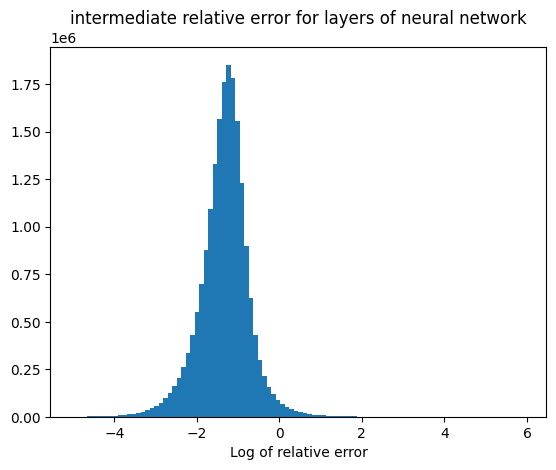

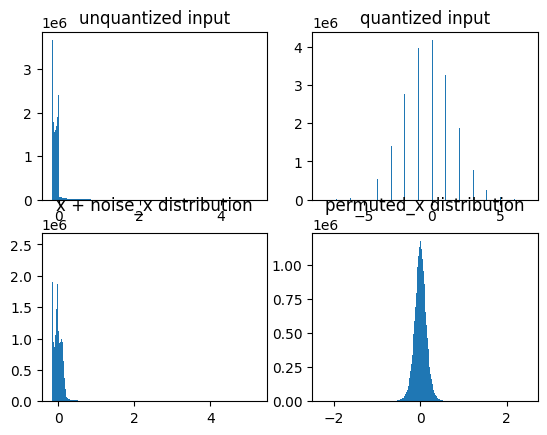

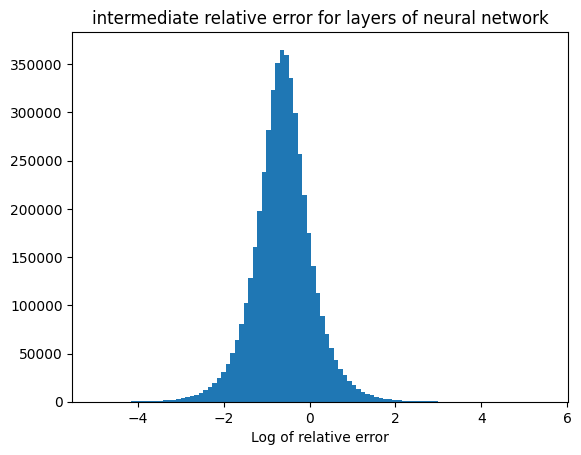

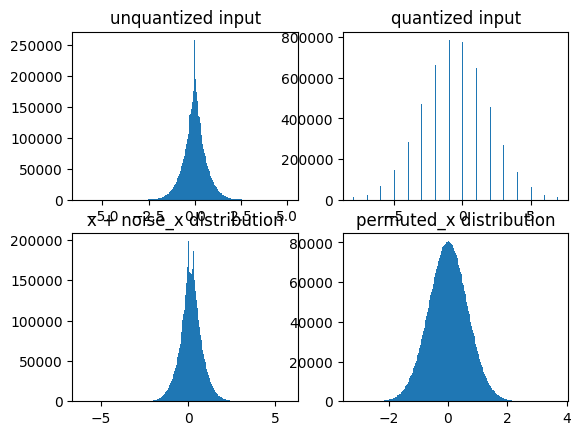

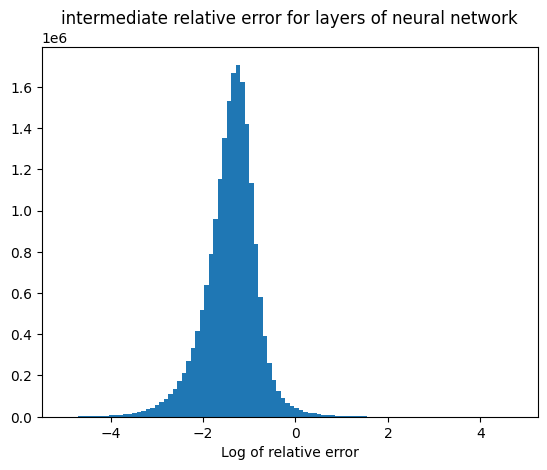

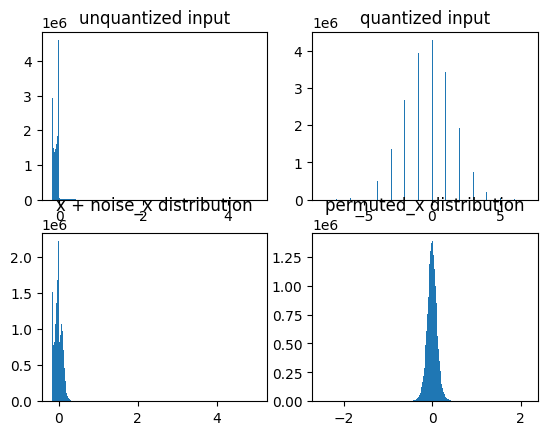

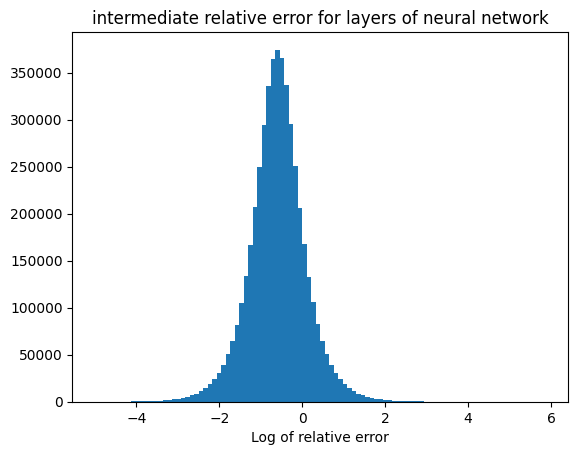

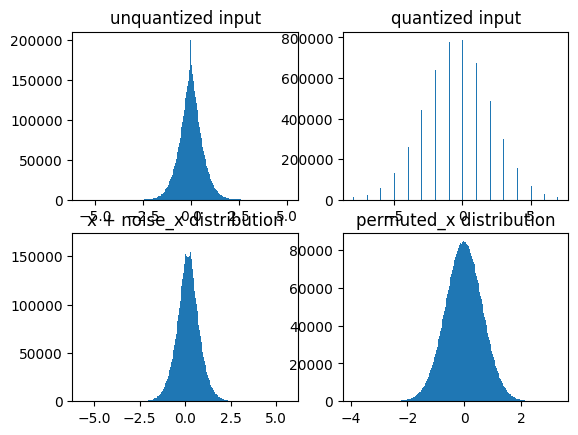

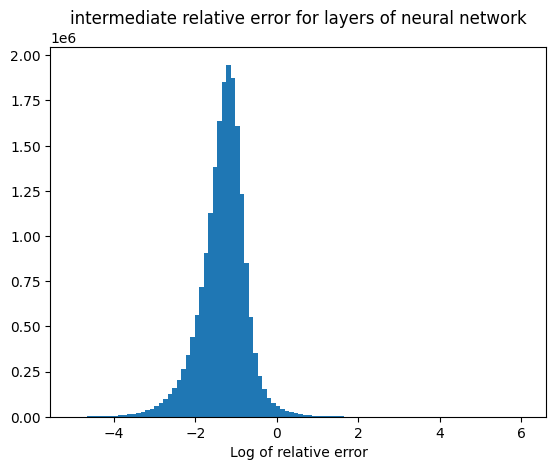

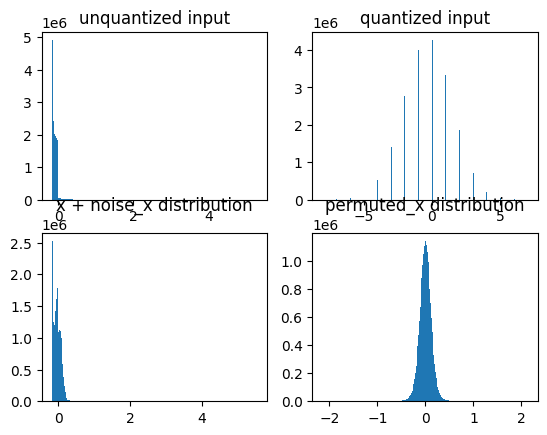

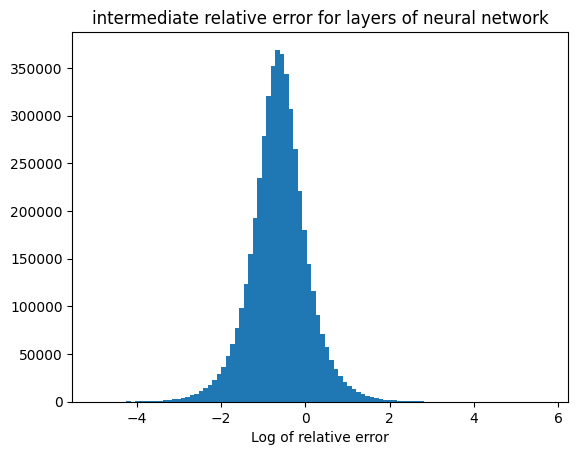

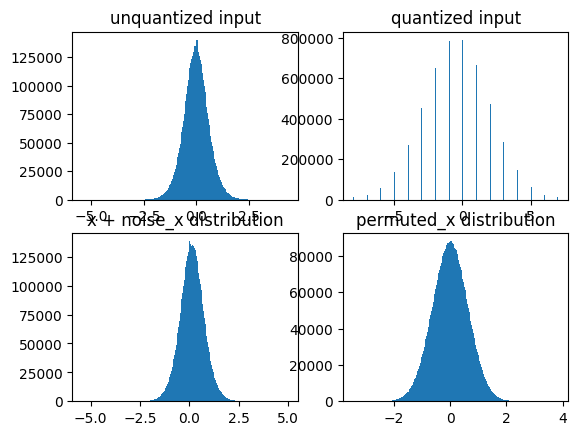

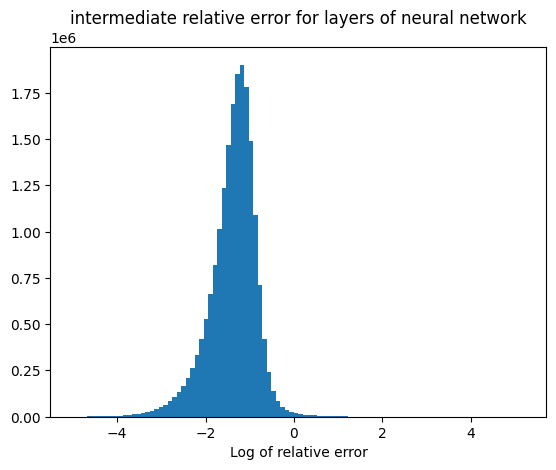

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fd0cb3b67d0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 

KeyboardInterrupt



In [4]:
from torch.utils.data import DataLoader
from imagenet.dataset import ImagenetDataset
import torch

dataset = ImagenetDataset(root='imagenet-val', transform=models.ViT_B_16_Weights.IMAGENET1K_V1.transforms())
model.eval()

with torch.no_grad():
    for X, y in DataLoader(dataset, batch_size=32):
        quantized_model(X.cuda())